In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
import warnings
warnings.filterwarnings('ignore')

# **EDA**

In [4]:

df = pd.read_csv(r'C:\Users\Iqbal\Downloads\online_shoppers_intention (1).csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
10104,0,0.0,1,14.0,19,1666.750000,0.000000,0.021053,0.0,0.0,Nov,8,13,9,20,Other,False,False
11651,0,0.0,2,13.0,45,3740.291667,0.012766,0.041884,0.0,0.0,Dec,2,10,1,1,Returning_Visitor,True,False
11210,0,0.0,0,0.0,14,416.666667,0.000000,0.019048,0.0,0.0,Dec,2,2,2,3,Returning_Visitor,False,False
8726,0,0.0,0,0.0,140,4096.090152,0.003810,0.011871,0.0,0.0,Nov,2,5,7,1,Returning_Visitor,False,False
9064,0,0.0,0,0.0,100,2781.125000,0.012000,0.037667,0.0,0.0,Dec,2,6,3,1,Returning_Visitor,False,False


**Unique Value**

In [7]:
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

**Duplicate Values**

In [8]:
df.duplicated().sum()

125

In [9]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
3544,1,82.0,0,0.0,59,1927.122222,0.007910,0.023729,23.876291,0.0,May,2,2,9,13,Returning_Visitor,False,True
3914,3,143.0,2,29.0,3,380.000000,0.000000,0.042857,0.000000,0.4,May,2,2,4,3,New_Visitor,False,False
10656,0,0.0,0,0.0,13,1600.000000,0.015385,0.020513,0.000000,0.0,Dec,2,2,1,20,Returning_Visitor,False,False
1439,2,94.0,0,0.0,25,893.100000,0.000000,0.009615,0.000000,0.0,Mar,2,4,4,1,Returning_Visitor,False,False
9274,0,0.0,0,0.0,13,549.200000,0.019231,0.045421,0.000000,0.0,Nov,3,2,6,2,Returning_Visitor,False,False


In [10]:
num_dtypes = ['int64','float64']
num_df = df.select_dtypes(include=num_dtypes)
numericals = num_df.columns
print(numericals)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')


In [11]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['Month', 'VisitorType', 'Weekend', 'Revenue', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
nums = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']

In [12]:
df[nums].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [13]:
df[cats].describe()

,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.124006,2.357097,3.147364,4.069586
std,0.911325,1.717277,2.401591,4.025169
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,2.000000
50%,2.000000,2.000000,3.000000,2.000000
75%,3.000000,2.000000,4.000000,4.000000
max,8.000000,13.000000,9.000000,20.000000


In [14]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

**Hasil Observasi Descriptive Statistics**

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?
Semua tipe data sudah sesuai namun ada perubahan sementara tipe data menjadi kategorikal untuk keperluan descriptive analytics seperti OperatingSystems, Browser, Region, Traffic Type, Weekend, dan Revenue.

B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
Tidak ada kolom yang memiliki nilai kosong.

C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)
Ada kolom yang memiliki nilai summary agak aneh yaitu hampir semua kolom memiliki nilai min/max terlalu jauh dari mean/median dan termasuk positive skewed distribution.

**Univariate Analysis**
Univariate Analysis dilakukan untuk menganalisa setiap kolom secara terpisah, melihat distribusi nilainya secara detail.


1.   Revenue
2.   Weekend
3.   Month
4.   Visitor Type
5.   Traffic Type
6.   Browser
7.   Operating System
8.   Region

**Revenue Analysis**

In [15]:
df[cats]['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

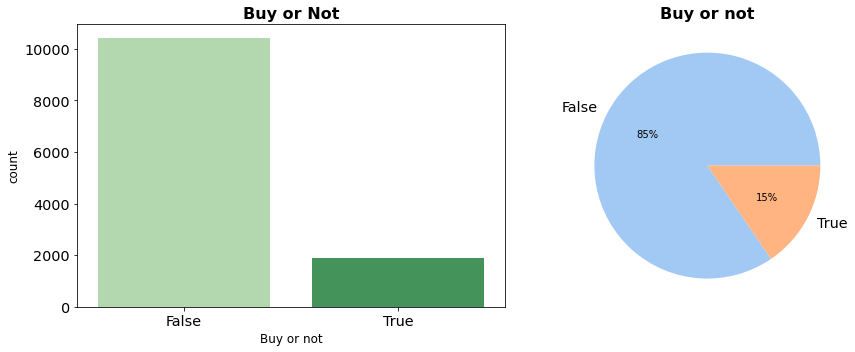

In [16]:
#Distribusi konsumen yang melakukan pembelian

# set the plot size
plt.figure(figsize=(13, 5))

# Ploting countplot
plt.subplot(1, 2, 1)
sns.countplot(x=df[cats]['Revenue'], palette = 'Greens')
plt.title('Buy or Not', fontweight='bold', fontsize = 16)
plt.xlabel('Buy or not', fontsize = 12)
plt.ylabel('count', fontsize = 12)

# Ploting pieplot
plt.subplot(1, 2, 2)
palette_color = sns.color_palette('pastel')
plt.pie(df[cats]['Revenue'].value_counts(), labels=df[cats]['Revenue'].unique(), colors = palette_color, autopct='%.0f%%')
plt.tight_layout()
plt.title('Buy or not', fontweight='bold', fontsize = 16)

#show the plot
plt.show()

**Hasil Observasi**
* Variabel "Revenue" ini merupakan variabel target.
* Variabel ini mengindikasikan apakah 'visit' konsumen berakhir dengan transaksi pembelian yang menghasilkan revenue.
* Grafik diatas menunjukan bahwa sangat kecil 'visit' yang berakhir dengan transaksi yang menghasilkan revenue. Hanya 15% dari total visit yang berujung pada transaksi.
* Hal ini menunjukan bahwa pada variabel target ini terjadi class imbalance karna ada nilai (false) yang mendominasi

**Weekend Analysis**

In [17]:
# Value count feature Weekend
df[cats]['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

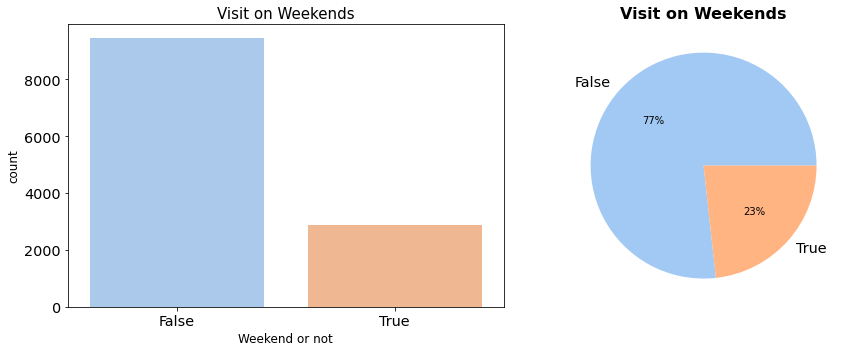

In [18]:
#Distribusi konsumen yang melakukan pembelian di Weekend/Weekdays

# set the plot size
plt.figure(figsize=(13, 5))

# Ploting countplot
plt.subplot(1, 2, 1)
sns.countplot(x=df[cats]['Weekend'], palette = 'pastel')
plt.title('Visit on Weekends', fontsize = 15)
plt.xlabel('Weekend or not', fontsize = 12)
plt.ylabel('count', fontsize = 12)

# Ploting pieplot
plt.subplot(1, 2, 2)
palette_color = sns.color_palette('pastel')
plt.pie(df[cats]['Weekend'].value_counts(), labels=df[cats]['Weekend'].unique(), colors = palette_color, autopct='%.0f%%')
plt.tight_layout()
plt.title('Visit on Weekends', fontweight='bold', fontsize = 16)

#show the plot
plt.show()

**Hasil Observasi**
* Variabel ini mengindikasikan berapa banyak konsumen yang melakukan visit pada saat weekend. True berarti visit dilakukan saat weekend, False berarti visit dilakukan saat bukan weekend (weekdays).
* Grafik diatas menunjukan bahwa sebagian besar 'visit' terjadi pada weekday. Hanya 23% dari total visit yang berlangsung saat weekend.
Month Analysis



**Month Analysis**

In [19]:
# Value count Month
df[cats]['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

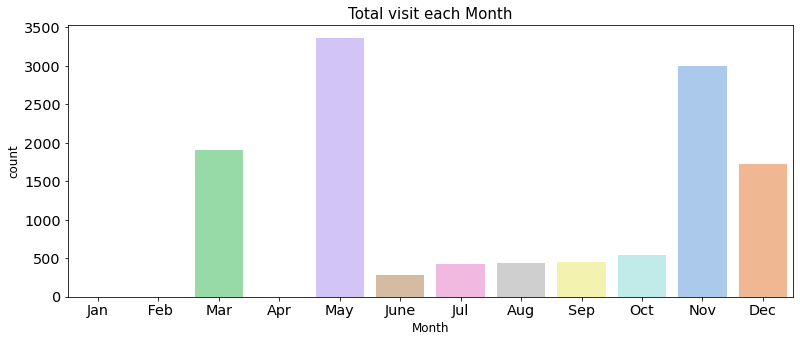

In [20]:
#ordering the month variable
month_lookup = ["Jan"," Feb", "Mar", "Apr", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# set the plot size
plt.figure(figsize = (13,5))

# Ploting countplot
sns.countplot(x=pd.Categorical(df['Month'], categories=month_lookup, ordered=True), palette = 'pastel')
plt.title('Total visit each Month', fontsize = 15)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('count', fontsize = 12)

# show the plot
plt.show()


**Hasil Observasi**

* Variabel ini mengindikasikan total visit pada masing-masing bulan.
* Grafik diatas menunjukan bahwa sebagian besar 'visit' terjadi pada bulan Mei, November, Maret dan Desember
* Terdapat 2 bulan yang tidak memiliki sesi visit sama sekali yaitu bulan Januari dan April

**Visitor Type Analysis**

In [21]:
# Value count VisitorType
df[cats]['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

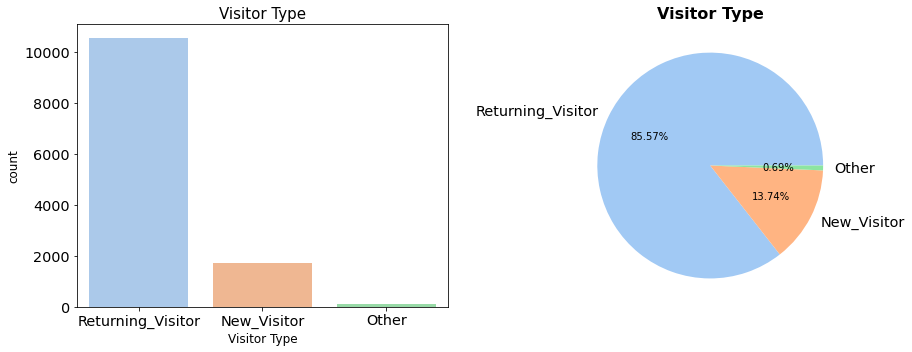

In [22]:
# set the plot size
plt.figure(figsize = (13,5))

# Ploting countplot
plt.subplot(1, 2, 1)
sns.countplot(x=df[cats]['VisitorType'], palette = 'pastel')
plt.title('Visitor Type', fontsize = 15)
plt.xlabel('Visitor Type', fontsize = 12)
plt.ylabel('count', fontsize = 12)


# Ploting pieplot
palette_color = sns.color_palette('pastel')
plt.subplot(1, 2, 2)
plt.pie(df[cats]['VisitorType'].value_counts(), labels=df[cats]['VisitorType'].unique(), colors = palette_color, autopct = '%.2f%%')
plt.tight_layout()
plt.title('Visitor Type', fontweight='bold', fontsize = 16)


# Show the plot
plt.show()

**Hasil Observasi**
* Variabel ini mengindikasikan jenis pengunjung yang melakukan visit.
Returning visitor merupakan visitor yang sudah pernah berkunjung sebelumnya.
New visitor merupakan visitor yang baru berkunjung pertama kalinya.
* Grafik diatas menunjukan bahwa sebagian besar pengunjung yang melakukan 'visit' adalah 'Returning Visitor' yaitu sebanyak 85.57% perbandingannya sangat jauh dengan visitor baru yang belum pernah mengunjungi website sebelumnya

**Traffic Type Analysis**

In [23]:
# value count TrafficType
df[cats]["TrafficType"].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

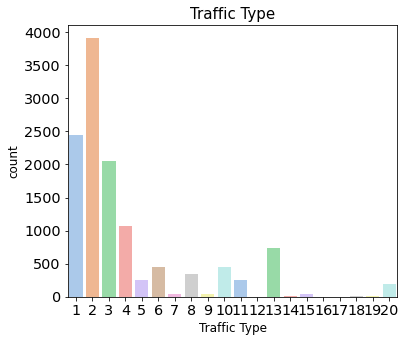

In [24]:
# set the plot size
plt.figure(figsize = (13,5))

# Ploting countplot
plt.subplot(1, 2, 1)
sns.countplot(x=df[cats]['TrafficType'], palette = 'pastel')
plt.title('Traffic Type', fontsize = 15)
plt.xlabel('Traffic Type', fontsize = 12)
plt.ylabel('count', fontsize = 12)

# Show the plot
plt.show()

**Hasil Observasi**
* Variabel ini mengindikasikan jumlah visit per masing-masing Tipe Traffic
* Terdapat banyak value (20) pada data kategorical TrafficType ini
* Grafik diatas menunjukan bahwa tipe traffic dengan visit terbanyak adalah 2,1, dan 3 secara berurutan.

**Browser Analysis**

In [25]:
# value count Browser
df[cats]['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

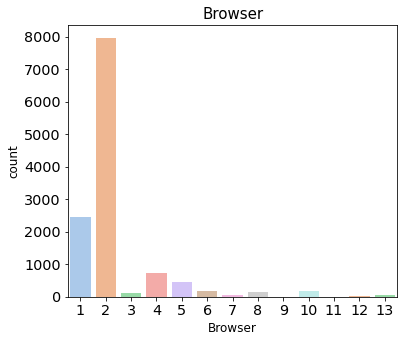

In [26]:
# set the plot size
plt.figure(figsize = (13,5))

# Ploting countplot
plt.subplot(1, 2, 1)
sns.countplot(x=df[cats]['Browser'], palette = 'pastel')
plt.title('Browser', fontsize = 15)
plt.xlabel('Browser', fontsize = 12)
plt.ylabel('count', fontsize = 12)

# Show the plot
plt.show()

**Hasil Observasi**
* Variabel ini mengindikasikan jumlah visit per masing-masing Tipe Browser
* Grafik diatas menunjukan bahwa terdapat visit dengan browser 2 lebih dominan dibanding browser lainnya yaitu tipe browser no 1 dan 2.

**Operating System Analysis**

In [27]:
# value count Operating Systems
df[cats]['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

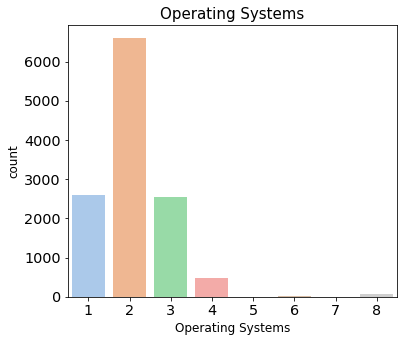

In [28]:
plt.figure(figsize = (13,5))

# Ploting countplot
plt.subplot(1, 2, 1)
sns.countplot(x=df[cats]['OperatingSystems'], palette = 'pastel')
plt.title('Operating Systems', fontsize = 15)
plt.xlabel('Operating Systems', fontsize = 12)
plt.ylabel('count', fontsize = 12)

# Show the plot
plt.show()

**Hasil Observasi**
* Variabel ini mengindikasikan jumlah visit per masing-masing Tipe operating system
* Grafik diatas menunjukan bahwa visit dengan OS 2 paling dominan digunakan, disusul oleh OS 1 dan 3.

**Region**

In [29]:
# value count Region
df[cats]['Region'].value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

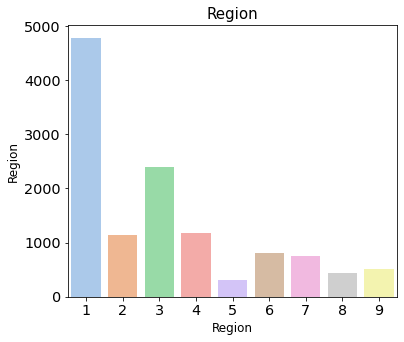

In [30]:
plt.figure(figsize = (13,5))

# Ploting countplot
plt.subplot(1, 2, 1)
sns.countplot(x=df[cats]['Region'], palette = 'pastel')
plt.title('Region', fontsize = 15)
plt.xlabel('Region', fontsize = 12)
plt.ylabel('Region', fontsize = 12)

# Show the plot
plt.show()

**Hasil Observasi**
* Variabel ini mengindikasikan Region dimana visitor melakukan visit.
* Grafik diatas menunjukan bahwa visitor dominan dari region 1 dan 3, sedangkan sisanya tersebar di 7 region lainnya

**Numerical Analysis**

1. Administrative
2. Administrative_Duration
3. Informational
4. Informational_Duration
5. ProductRelated
6. ProductRelated_Duration
7. BounceRates
8. ExitRates
9. PageValues
10. SpecialDay

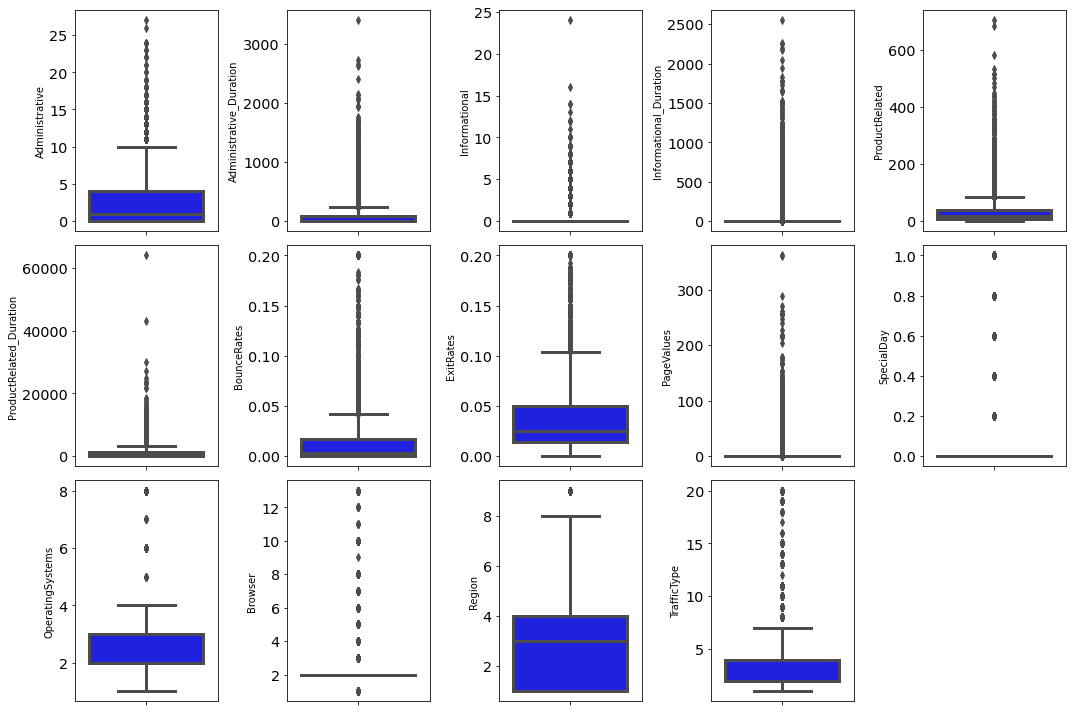

In [31]:
plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[nums[i]], color='blue', orient='v')
    plt.tight_layout()

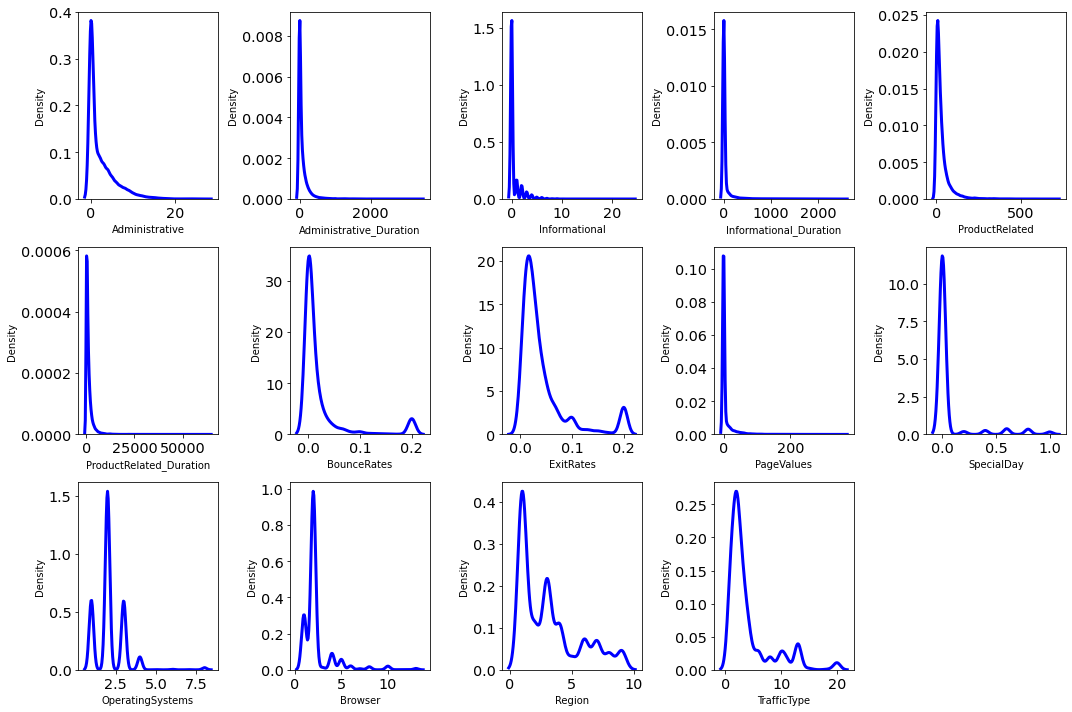

In [32]:
plt.figure(figsize=(15,10))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(df[nums[i]], color='blue')
    plt.tight_layout()

In [ ]:

skew = df.skew().to_frame()
skew.columns = ['skewness']
skew

Bagaimana menafsirkan kemiringan Aturan praktis mengatakan:

-Jika kemiringan antara -0,5 dan 0,5, data cukup simetris (distribusi normal).
-Jika kemiringan antara -1 dan -0,5 (miring negatif) atau antara 0,5 dan 1 (miring positif), data memiliki kecondongan sedang.
-Jika kemiringan kurang dari -1 (miring negatif) atau lebih besar dari 1 (miring positif), data sangat miring.

**Ringkasan Analisa Unvariate**

1. Seluruh data numerik memiliki tipe positive skewed.
2. Terdapat terlalu banyak outlier untuk fitur-fitur numerik.
3. Terdapat class imbalance untuk fitur Revenue, Weekend dan Visitor Type.
4. Nilai dominan dari masing-masing fitur sebagai berikut:
*   Revenue - Visitor yang tidak menghasilkan revenue jauh lebih banyak dibanding visitor menghasilkan revenue.
*   Weekend- Visitor lebih banyak di Weekdays daripada di weekend
*   Month - Bulan dengan jumlah visitor signifikan ada di Mei, November, Maret dan Desember. Terdapat 2 bulan tanpa visitor yaitu bulan Januari dan April.
*   Visitor Type - Visitor yang dominan merupakan Returning Visitor. dan terdapat tipe lain 'Others' yang perlu digali lebih jauh.
*   Traffic Type - Tipe traffic terbanyak adalah 2,1 dan 3.
*   Browser - Browser yang dominan digunakan adalah browser 2.
*   Operating System- Operating System yang lebih banyak digunakan adalah 3 dan 1 

5. Terlalu banyak unique value (20) di fitur traffic




**Insight untuk Data Pre-Processing**
1.   Memutuskan variabel target dan variabel fitur
2.   Putuskan apakah duplicate value digunakan atau tidak
3.   Lakukan encoding fitur: label encoding untuk Month dan Weekend, one-hot encoding untuk Visitor Type
4.   Handling Outliers : antara menggunakan zscore atau IQR
5. Handling Class Imbalance menggunakan oversampling method untuk menyeimbangkan label Revenue.
6. Lakukan Transformasi untuk variabel fitur sehingga Machine Learning dapat diaplikasikan- normalisasi
7. Handling Skewed- Log transformation



**Multivariate Analysis**

**Numeric Feature**

In [64]:

df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


<AxesSubplot:>

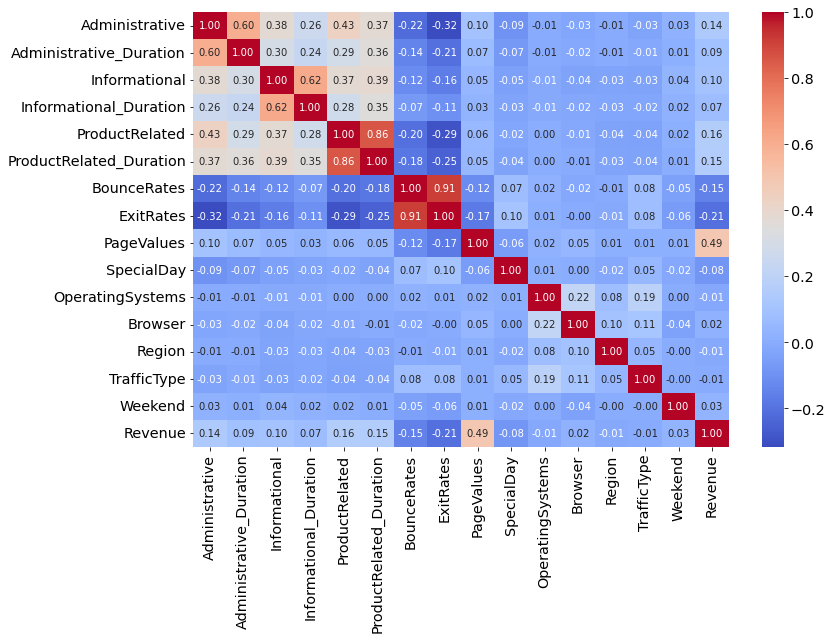

In [65]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')

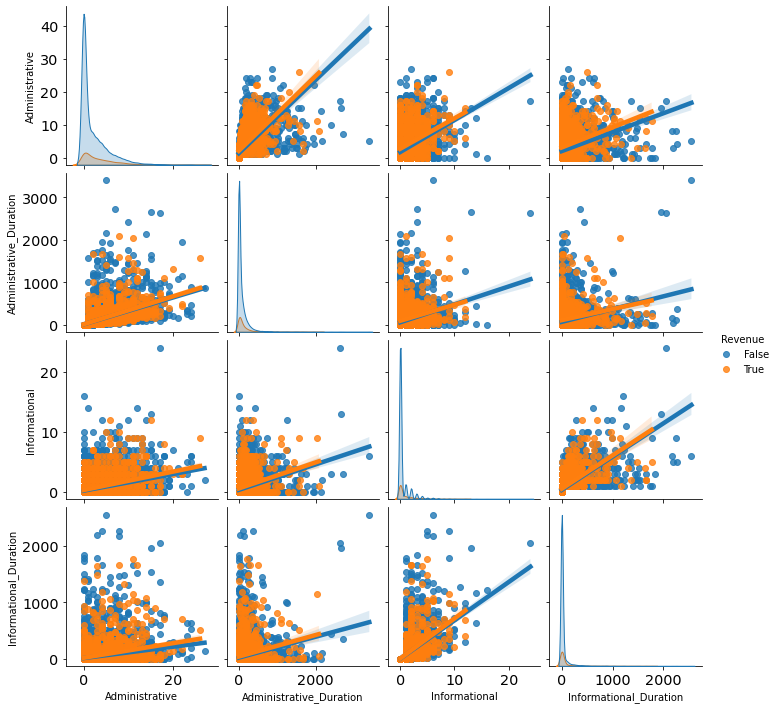

In [66]:

sns.pairplot(df.loc[:,['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'Revenue']],hue='Revenue',kind='reg')

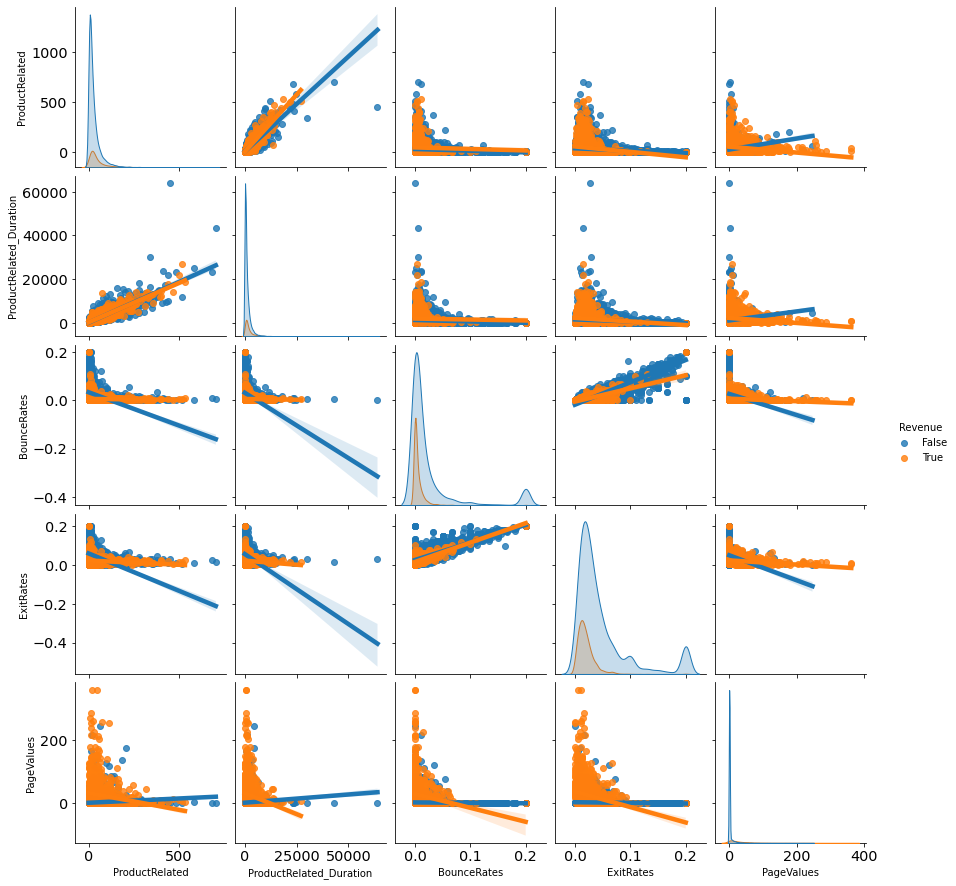

In [67]:
sns.pairplot(df.loc[:,['ProductRelated', 'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'Revenue']],hue='Revenue',kind='reg')

In [68]:
nums1 = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'Weekend', 'Revenue']

Text(0.5, 1.05, 'Revenue vs Numeric Feature')

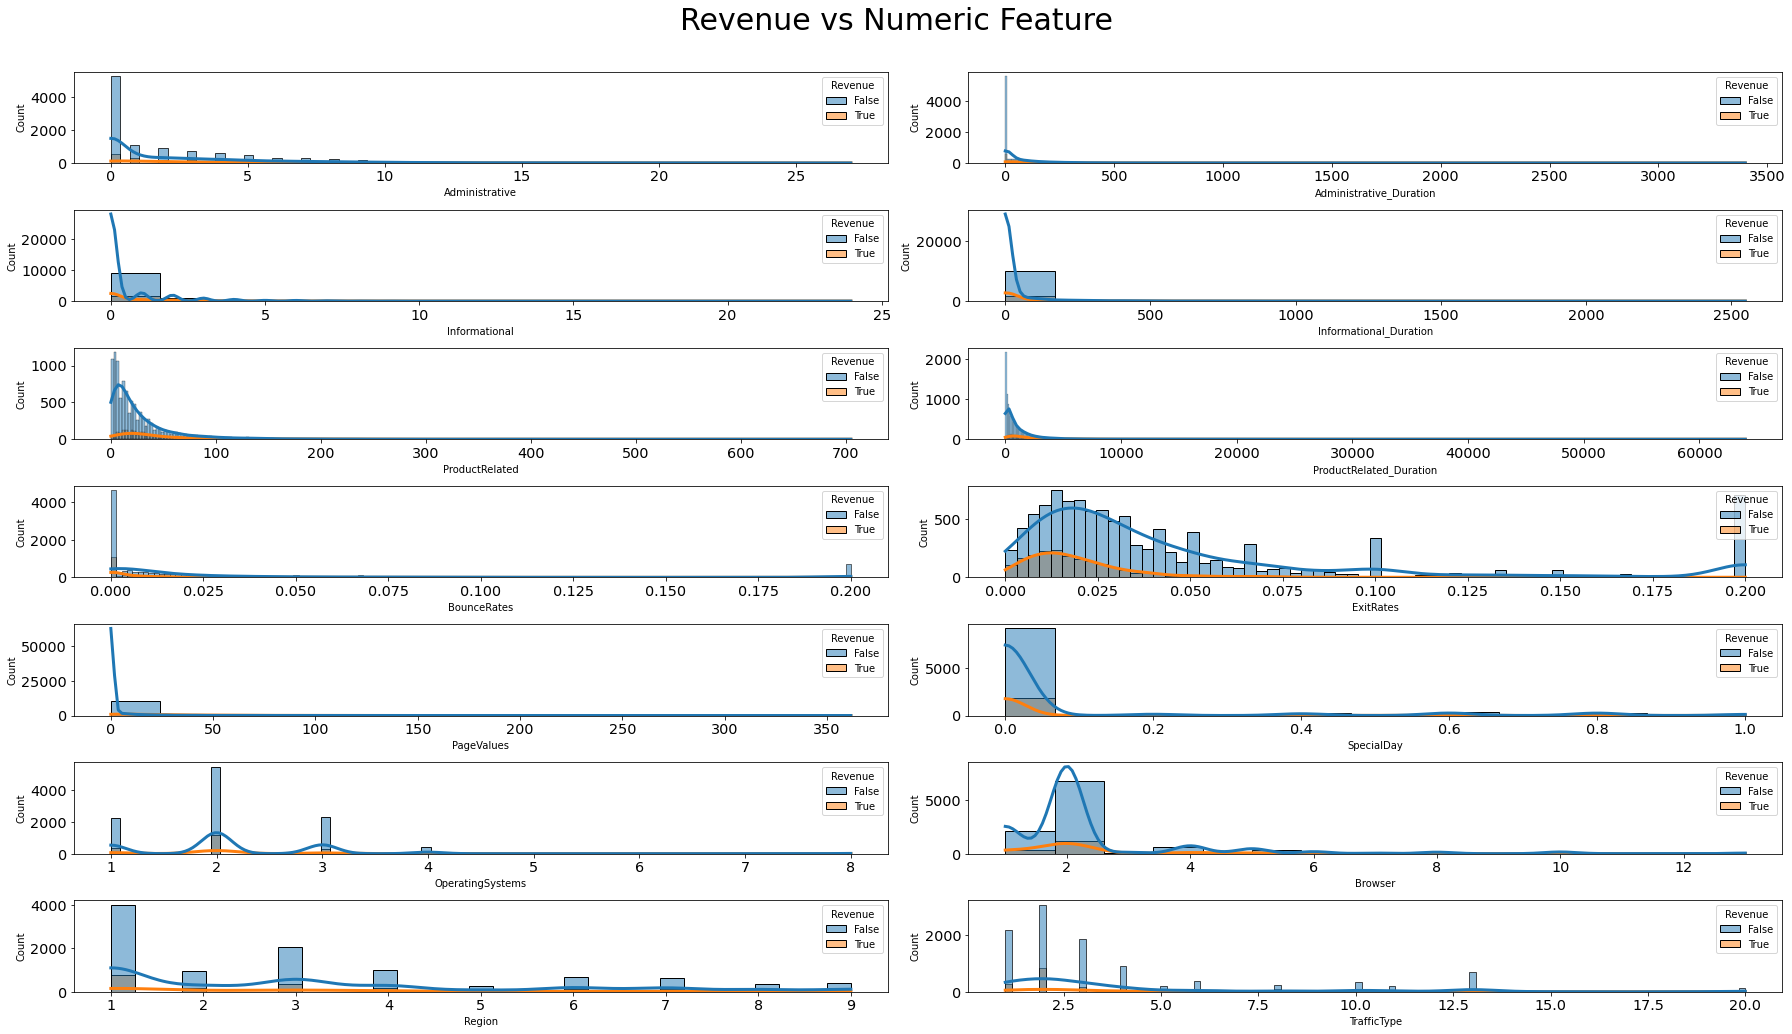

In [69]:
fig = plt.figure(figsize=(25, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(8, 2, i+1)
    sns.histplot(x=df[nums[i]],hue=df['Revenue'],kde=True)
    plt.tight_layout()
fig.suptitle('Revenue vs Numeric Feature', fontsize=30, x=0.5, y=1.05)

**Categorical Value**

Text(0.5, 0.9, 'Visitor Type Relation')

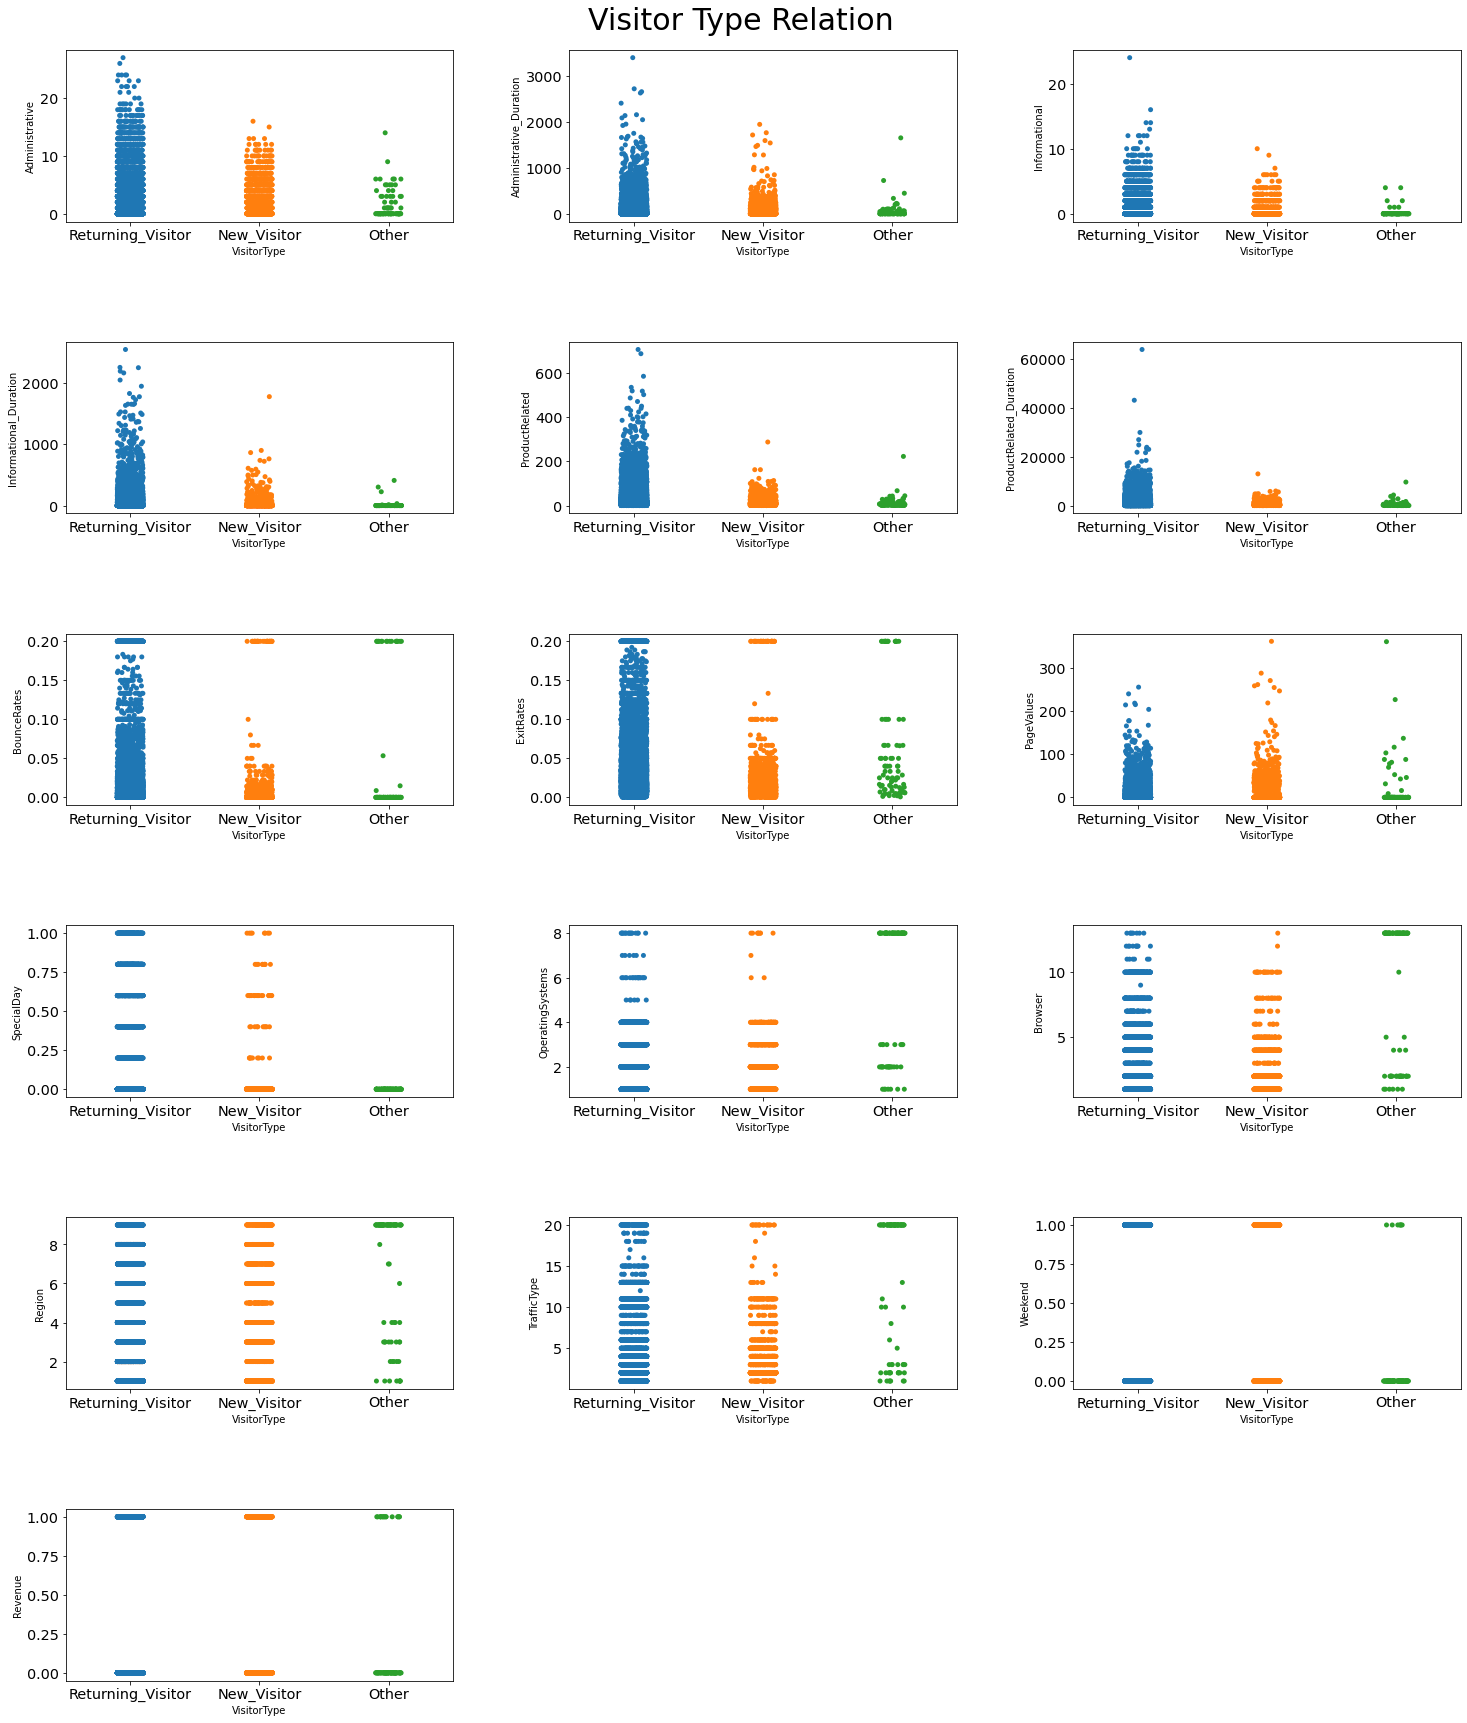

In [70]:

fig = plt.figure(figsize=(25, 30))
for i in range(0, len(nums1)): # untuk setiap kolom numerik
    ax = fig.add_subplot(6, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='VisitorType', y=nums1[i]) # gambar catplot/stripplotnya
    plt.subplots_adjust(hspace=0.7,wspace=0.3)
fig.suptitle('Visitor Type Relation', fontsize=30, x=0.5, y=0.9)

Text(0.5, 0.9, 'Month Relation')

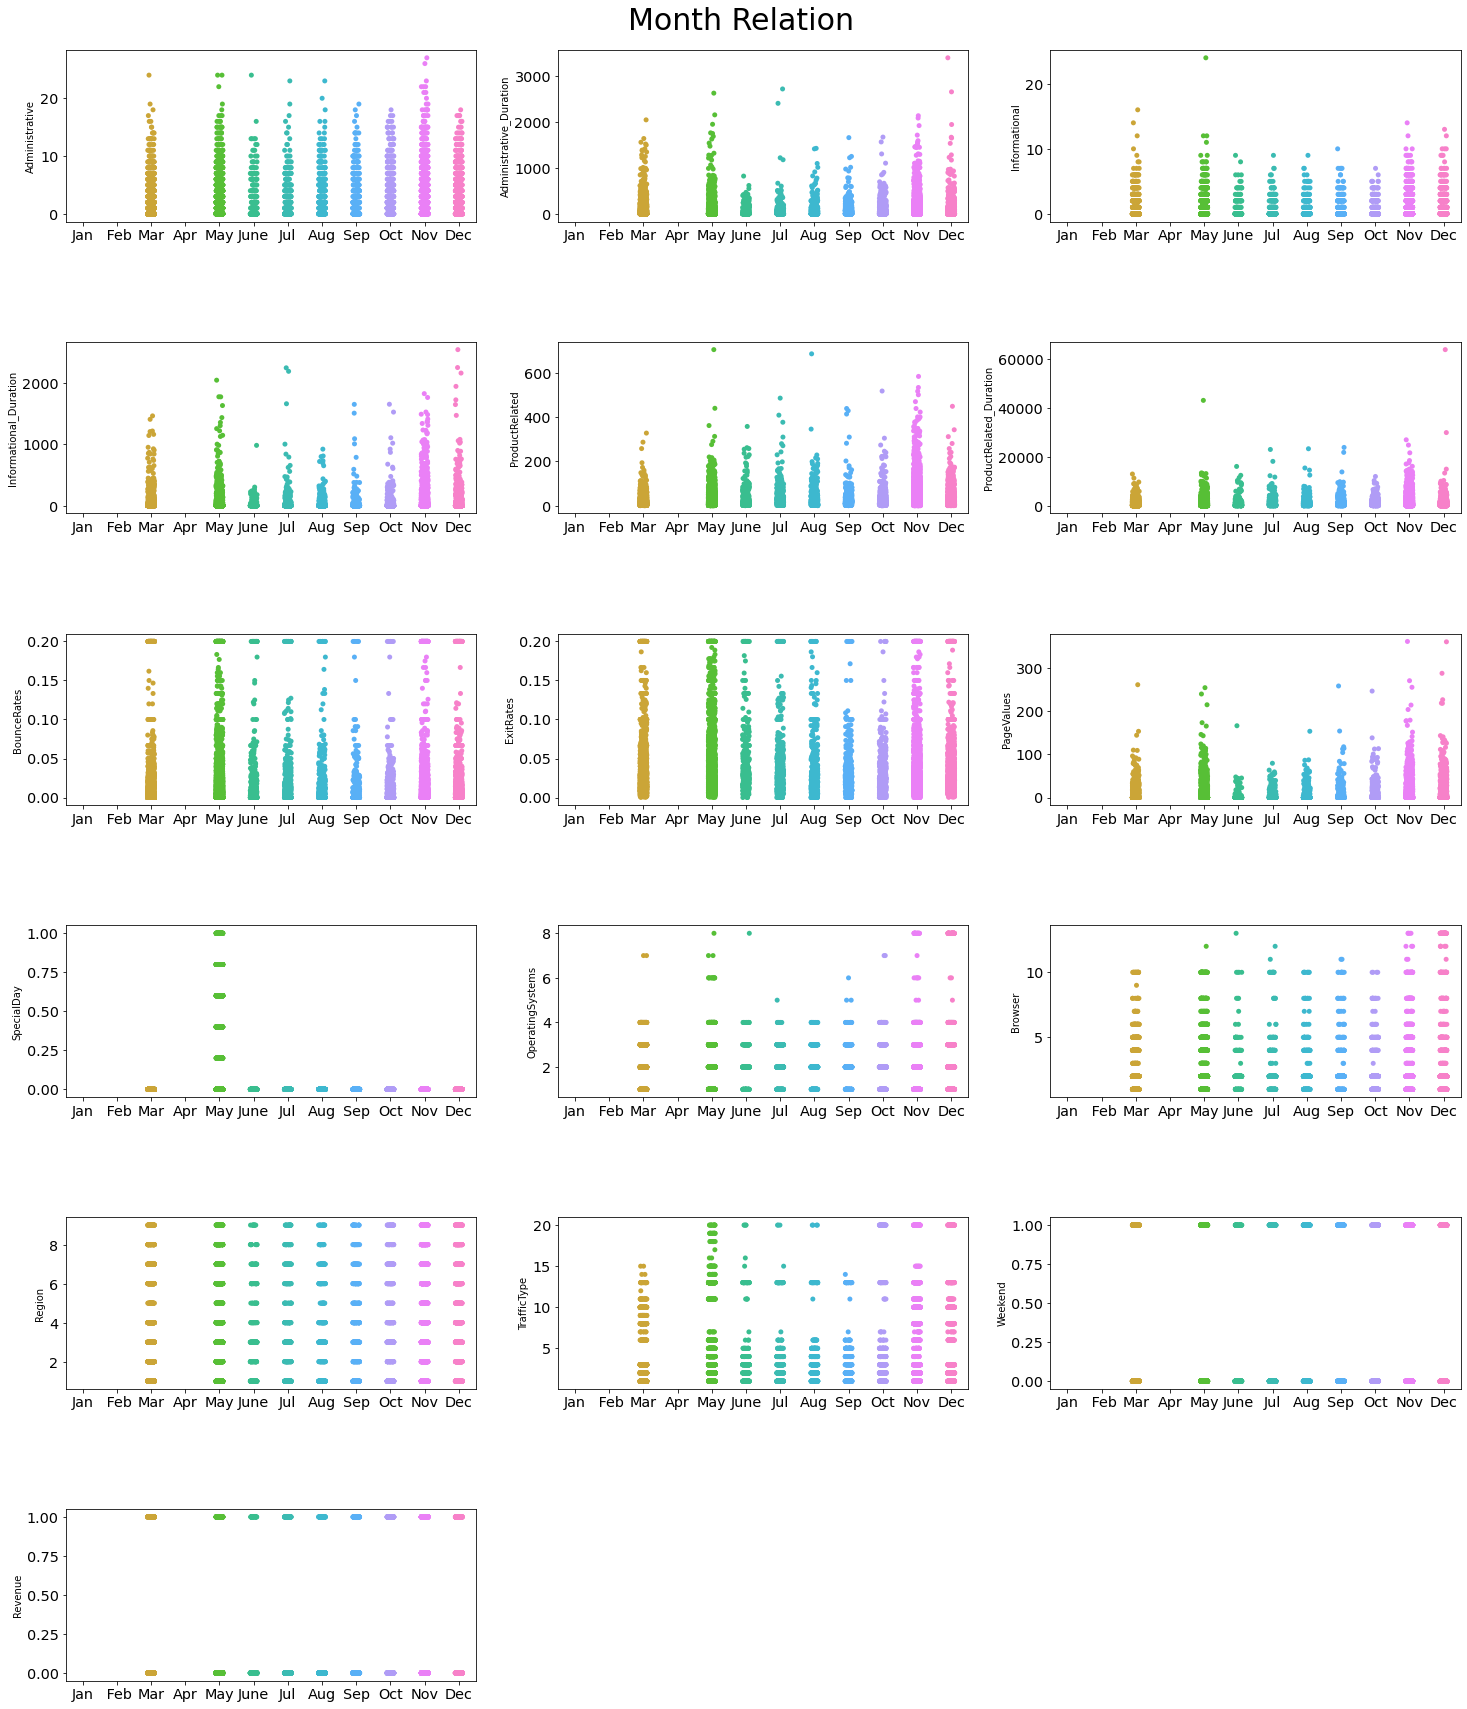

In [71]:
#ordering the month variable
month_lookup = ["Jan"," Feb", "Mar", "Apr", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

fig = plt.figure(figsize=(25, 30))
for i in range(0, len(nums1)): # untuk setiap kolom numerik
    ax = fig.add_subplot(6, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x=pd.Categorical(df['Month'], categories=month_lookup, ordered=True), y=nums1[i]) # gambar catplot/stripplotnya
    plt.subplots_adjust(hspace=0.7,wspace=0.2)
fig.suptitle('Month Relation', fontsize=30, x=0.5, y=0.9)

<AxesSubplot:xlabel='Month', ylabel='Count'>

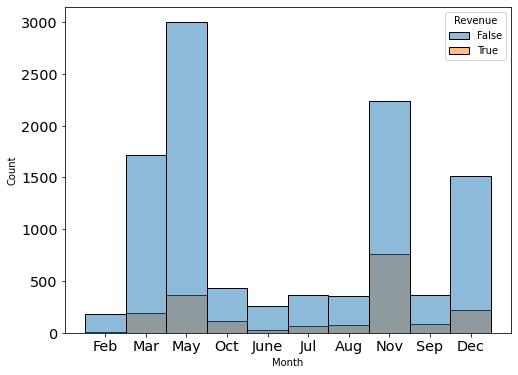

In [72]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Month', hue='Revenue')

Text(0.5, 1.05, 'Revenue vs Categorical Feature')

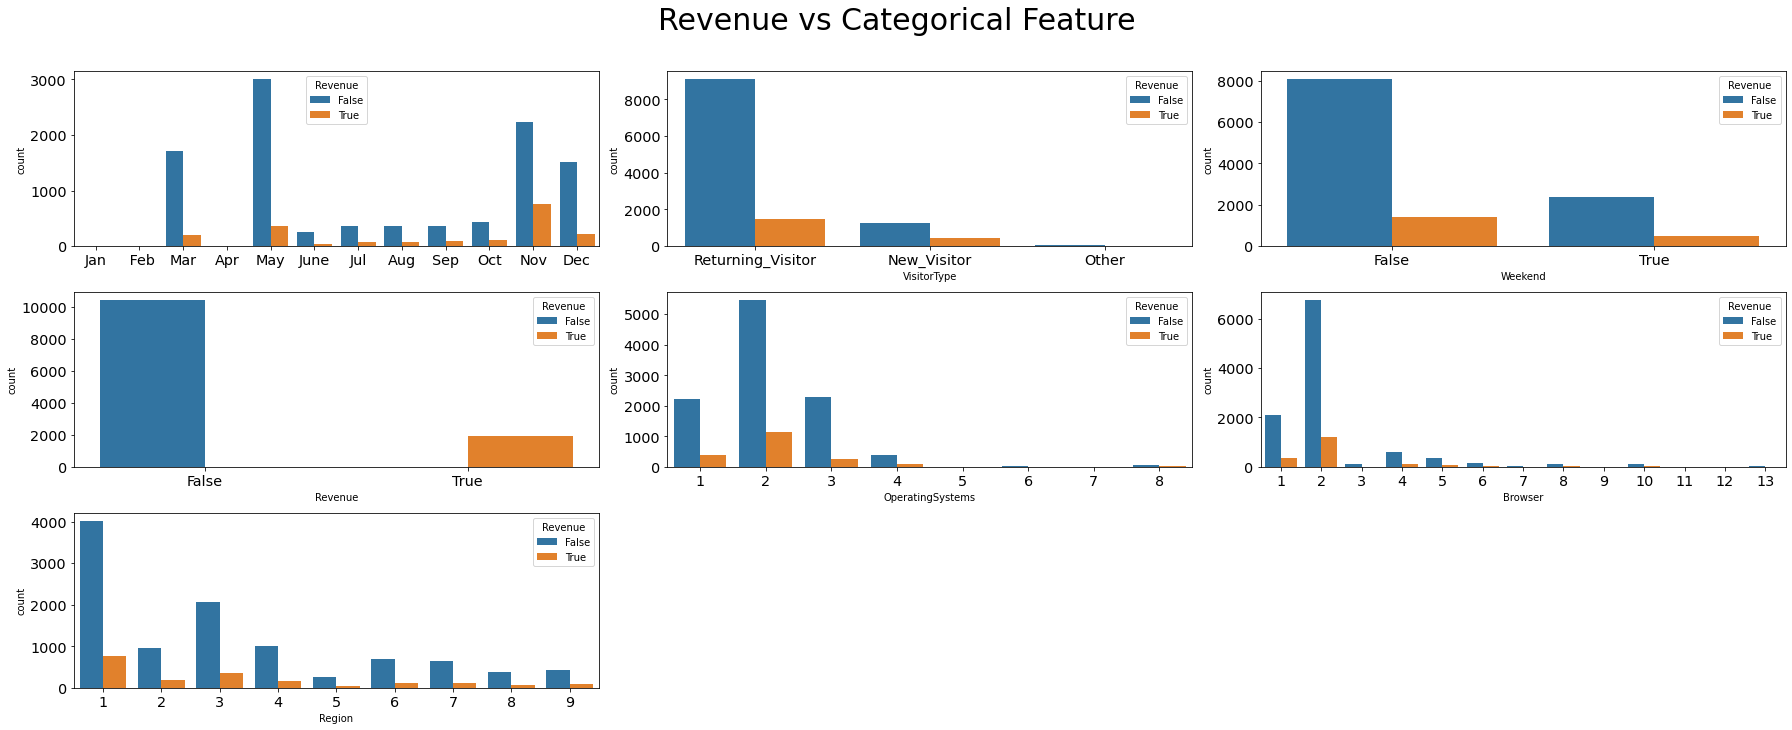

In [73]:
fig = plt.figure(figsize=(25, 15))
for i in range(0, len(cats)-1):
    ax = fig.add_subplot(5, 3, i+1)
    if cats[i] == 'Month' :
        #ordering the month variable
        month_lookup = ["Jan"," Feb", "Mar", "Apr", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
        sns.countplot(x=pd.Categorical(df['Month'], categories=month_lookup, ordered=True),hue=df['Revenue'])
    else :
        sns.countplot(x=df[cats[i]],hue=df['Revenue'])
    plt.tight_layout()
fig.suptitle('Revenue vs Categorical Feature', fontsize=30, x=0.5, y=1.05)

**Hasil Analisa Multivariate**
**Degree of correlation:**
* Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).
* High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
* Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
* Low degree: When the value lies below ± 0.29, then it is said to be a small correlation.
* No correlation: When the value is zero.

* Berdasarkan nilai korelasi antara feature dan target “Revenue”, feature page values mempunyai korelasi moderate positif dengan target. Sedangkan feature lainnya berkorelasi rendah dengan feature target, karena nilai korelasinya +- 0.29. Namun beberapa feature yang mempunyai nilai korelasi +- 0.1 seperti feature bounce rates, exit rates, product related, product related duration, dan aadministrative perlu diperhatikan juga.

* Terdapat korelasi kuat antar feature seperti bounce rates dan exit rates, product related dan product related duration, informational duration dan informational, administrative dan administrative duration. Feature feature ini harus dihilangkan salah satu, karena bersifat redundant.

* Berdasarkan stripplot, feature visitor type mempunyai pola yang berbeda antar visitor di bagian feature administrative, administrative duration, informational, informational duration, product related, product relate duration, bounce rate, exit rate.

* Berdasarkan stripplot, feature month mempunyai pola yang berbeda pada feature special day. Menurut analisis univariate terdapat 4 bulan tertinggi yang menghasilkan revenue yaitu bulan Mei, November, Maret dan Desember. Namun Nilai Special day yang tertinggi hanya ada di bulan Mei, sedangkan nilai bulan yang lain sama.

**Insight Bisnis**
1. Metode yang digunakan saat ini belum tepat untuk menghasilkan revenue, hal ini tampil dari data bahwa banyaknya jumlah visitor tidak berakhir dengan revenue.
2. Karena jumlah visitor banyak di weekdays, maka program-program dapat diarahkan di hari-hari weekdays.
3. Jumlah new visitor sangat rendah dibandingkan returning, ini mengindikasikan kemungkinan website ini belum cukup dikenal. Karena dengan nilai returning tinggi, maka visitor yang pernah mengunjungi ada kemungkinan kembali datang.Perlu meningkatkan jumlah visitor baru salah satunya dengan cara branding yang lebih luas.
4. Traffic Type , browser dan operating sistem yang digunakan mengerucut pada 2 sampai 3 jenis saja. Perlu dijajaki kemungkinan kerjasama dengan beberapa jenis browser ini saja. Supaya usaha tepat sasaran.

5. Ada bulan-bulan dengan visitor tinggi, perlu dianalisa ada event khususkah selama itu atau ada promo atau materi yang berbeda di momen-momen ini. 



### **Data Preprocessing**

## A.  Handling Missing Value

---



In [74]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## B. Handling Duplicated Data

In [75]:
# cek jumlah duplicated rows
# dari semua kolom
df.duplicated().sum()

125

In [76]:
# Copy for assigning df_ol_shop
df_ol_shop_2 = df.copy()

# Drop Duplicate
df_ol_shop_2 = df_ol_shop_2.drop_duplicates(ignore_index=True)

df_ol_shop_2

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12201,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12202,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12203,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [77]:
# Check after delete duplicate data 

df_ol_shop_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

In [78]:
df_ol_shop_2.duplicated().sum()

0

In [79]:
# pengelompokan kolom berdasarkan jenisnya

nums = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated','ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

cats = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month', 'VisitorType', 'Weekend', 'Revenue']

## C. Handling Outlier 

In [80]:
df_ol_shop_2[nums].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


**Menggunakan Zscore**

In [81]:
from scipy import stats

In [82]:
print('Data Sebelum handling outlier: ', len(df_ol_shop_2))

filtered_entries = np.array([True] * len(df_ol_shop_2))
# print(filtered_entries)

for col in nums:
    zscore = abs(stats.zscore(df_ol_shop_2[col]))
    # print(zscore)
    filtered_entries = (zscore < 3) & filtered_entries
    # print(filtered_entries)

df_ol_shop_zscore = df_ol_shop_2[filtered_entries]
print('Data sesudah handling outlier: ', len(df_ol_shop_zscore))

Data Sebelum handling outlier:  12205
Data sesudah handling outlier:  10020


##Menggunakan IQR

In [83]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_ol_shop_2)}')

filtered_entries = np.array([True] * len(df_ol_shop_2))
for col in nums:
    Q1 = df_ol_shop_2[col].quantile(0.25)
    Q3 = df_ol_shop_2[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_ol_shop_2[col] >= low_limit) & (df_ol_shop_2[col] <= high_limit)) & filtered_entries
    
df_ol_shop_iqr = df_ol_shop_2[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_ol_shop_iqr)}')

Jumlah baris sebelum memfilter outlier: 12205
Jumlah baris setelah memfilter outlier: 5044


##Menggunakan Flooring dan Capping

In [84]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_ol_shop_2)}')

filtered_entries = np.array([True] * len(df_ol_shop_2))
for col in nums:
    low_limit = df_ol_shop_2[col].quantile(0.10)
    high_limit = df_ol_shop_2[col].quantile(0.90)
    

    filtered_entries = ((df_ol_shop_2[col] >= low_limit) & (df_ol_shop_2[col] <= high_limit)) & filtered_entries
    
df_ol_shop_flor_cap = df_ol_shop_2[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_ol_shop_flor_cap)}')

Jumlah baris sebelum memfilter outlier: 12205
Jumlah baris setelah memfilter outlier: 5150


Handle Outlier dengan menggunakan Zscore menghasilkan perubahan jumlah data dari 12205 menjadi 10020, sedangkan menggunakan IQR dan Flooring and Capping terlalu banyak data (>10%) yang dihapus . Oleh Karena itu tidak perlu dilakukan handling outlier(penghapusan data outlier), melainkan dilakukan feature transformation saja

## D. Feature Transformation

Data sebaran sebelum dilakukan Feature transformation

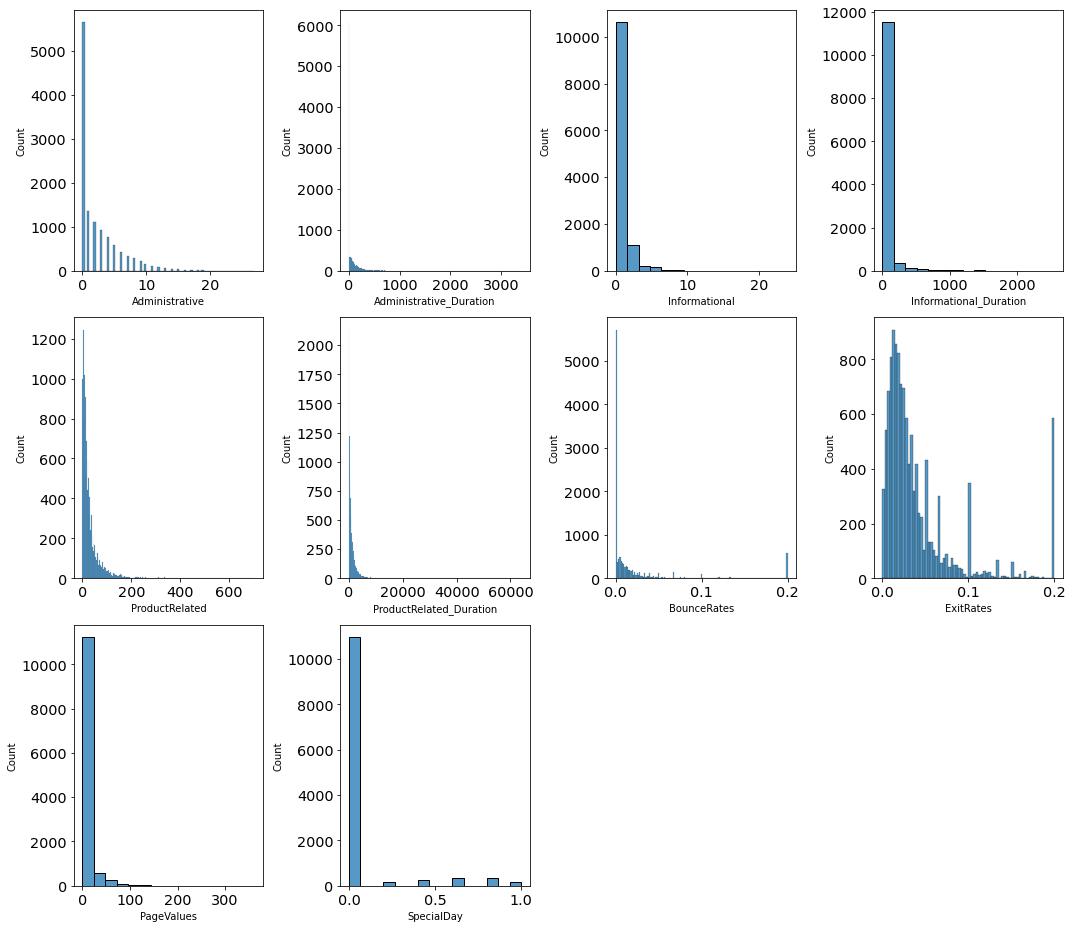

In [85]:
fig = plt.figure(figsize=(15, 13))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 4, i+1) # kita set posisi plotnya di layout
    sns.histplot(data=df_ol_shop_2, x=nums[i]) # 
    plt.tight_layout()

Menggunakan Robust Scaler

In [86]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [87]:
df_ol_shop_robust_scaler = df_ol_shop_2.copy()

df_ol_shop_robust_scaler.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
9164,9,65.166667,0,0.0,123,5969.573168,0.001538,0.013923,10.69238,0.0,Nov,2,1,1,2,New_Visitor,False,True
3391,0,0.000000,0,0.0,14,1025.000000,0.042857,0.066667,0.00000,0.0,May,4,2,1,13,Returning_Visitor,False,False
10242,0,0.000000,0,0.0,13,135.875000,0.030769,0.076923,0.00000,0.0,Nov,1,2,1,1,Returning_Visitor,True,False
1404,0,0.000000,0,0.0,7,88.333333,0.000000,0.042857,0.00000,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
5253,0,0.000000,0,0.0,5,70.000000,0.040000,0.120000,0.00000,0.0,May,1,1,1,3,Returning_Visitor,False,False


In [88]:
nums_robust = []
for col in nums:
    col_name = 'robust_' + col
    nums_robust.append(col_name)
    df_ol_shop_robust_scaler[col_name] = scaler.fit_transform(df_ol_shop_robust_scaler[col].values.reshape(len(df_ol_shop_robust_scaler), 1))
    df_ol_shop_robust_scaler = df_ol_shop_robust_scaler.drop(columns=col)

df_ol_shop_robust_scaler.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,robust_Administrative,robust_Administrative_Duration,robust_Informational,robust_Informational_Duration,robust_ProductRelated,robust_ProductRelated_Duration,robust_BounceRates,robust_ExitRates,robust_PageValues,robust_SpecialDay
1109,Mar,2,5,1,2,Returning_Visitor,False,False,2.00,2.129532,3.0,127.0,1.233333,0.701358,0.213184,-0.141077,14.683245,0.0
3405,May,3,2,7,13,Returning_Visitor,False,False,-0.25,-0.095037,0.0,0.0,0.600000,-0.106121,4.366627,2.201573,0.000000,0.8
1955,Mar,2,5,3,2,Returning_Visitor,True,False,-0.25,-0.095037,0.0,0.0,-0.466667,-0.375689,0.826087,1.943723,0.000000,0.0
6713,Jul,2,2,6,2,New_Visitor,False,False,0.25,1.265048,2.0,49.3,-0.166667,0.071337,-0.173913,-0.557391,0.000000,0.0
8988,Nov,2,5,7,10,Returning_Visitor,False,True,0.00,-0.042239,0.0,0.0,0.633333,1.266892,-0.173913,-0.413698,50.075990,0.0


Perbandingan Sebaran Data Sebelum dan Sesudah dilakukan Robust Scaler

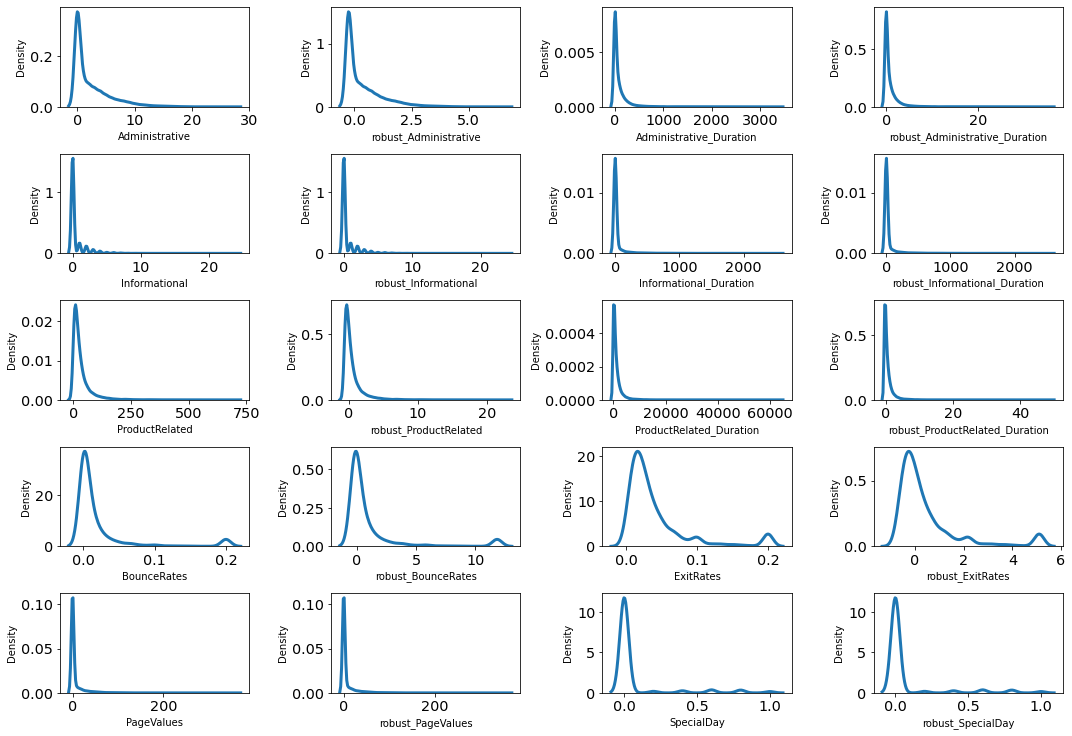

In [89]:
fig = plt.figure(figsize=(15, 20))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(10, 4, (2*i)+1) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_2, x=nums[i]) # 
    ax = fig.add_subplot(10, 4, (2*i)+2) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_robust_scaler, x=nums_robust[i])

    plt.tight_layout()

**Menggunakan Log Transformation**

In [90]:
df_ol_shop_log_transformation = df_ol_shop_2.copy()

df_ol_shop_log_transformation.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5442,2,63.500,0,0.0,104,1667.158421,0.000000,0.002547,0.0000,0.0,Jul,2,4,2,1,Returning_Visitor,True,False
6280,2,20.200,0,0.0,7,114.533333,0.000000,0.050000,0.0000,0.0,Oct,2,2,1,1,Returning_Visitor,False,False
4706,1,5.000,0,0.0,59,1261.166667,0.035380,0.060877,0.0000,0.6,May,2,2,1,1,Returning_Visitor,False,False
2166,6,153.275,3,394.0,25,599.100000,0.013333,0.030152,22.3392,0.0,May,1,1,3,4,Returning_Visitor,True,False
3503,0,0.000,0,0.0,2,44.000000,0.000000,0.100000,0.0000,0.0,May,2,2,3,6,Returning_Visitor,False,False


In [91]:
nums_log = []
for col in nums:
    log_name_colum = 'log_' + col
    nums_log.append(log_name_colum)
    # print(log_name_colum)
    # np.log(df.mask(df <=0)).fillna(0)
    df_ol_shop_log_transformation[log_name_colum] = np.log(df_ol_shop_log_transformation[col])
    # df_ol_shop_log_transformation[log_name_colum] = np.log(df_ol_shop_log_transformation[col].mask(df_ol_shop_log_transformation[col] <= 0)).fillna(0)
    df_ol_shop_log_transformation = df_ol_shop_log_transformation.drop(columns=col)

# print(nums_log)
df_ol_shop_log_transformation.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,log_Administrative,log_Administrative_Duration,log_Informational,log_Informational_Duration,log_ProductRelated,log_ProductRelated_Duration,log_BounceRates,log_ExitRates,log_PageValues,log_SpecialDay
485,Mar,3,2,3,9,Returning_Visitor,True,False,-inf,-inf,-inf,-inf,0.000000,2.302585,-inf,-2.302585,-inf,-inf
8147,Dec,1,1,2,1,Returning_Visitor,False,False,1.945910,4.991566,-inf,-inf,2.302585,4.983607,-2.931194,-2.675260,-inf,-inf
9063,Nov,2,2,1,10,Returning_Visitor,False,False,0.693147,1.945910,-inf,-inf,2.995732,6.120114,-4.700480,-3.659026,-inf,-inf
11552,Dec,2,2,1,2,New_Visitor,False,False,0.000000,4.488636,-inf,-inf,2.397895,6.034883,-4.605170,-3.506558,-inf,-inf
12109,Nov,2,4,1,8,New_Visitor,False,True,-inf,-inf,-inf,-inf,3.583519,6.771745,-inf,-4.953477,4.394786,-inf


Perbandingan Sebaran Data Sebelum dan Sesudah dilakukan Log Transformation

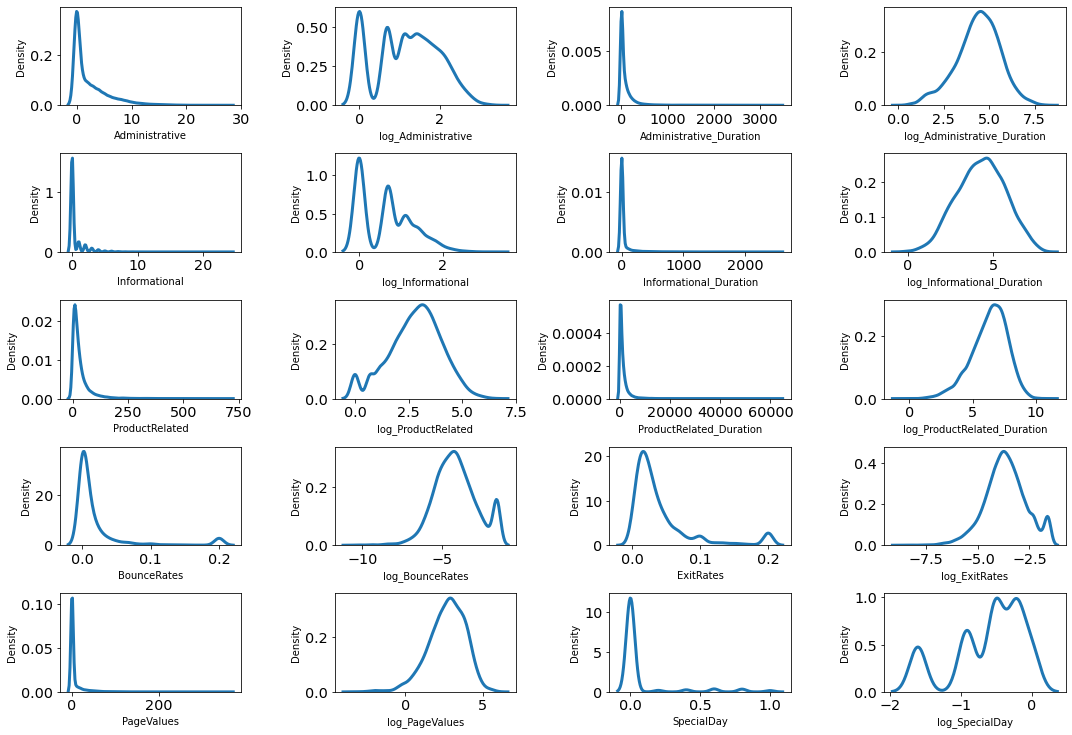

In [92]:
fig = plt.figure(figsize=(15, 20))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(10, 4, (2*i)+1) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_2, x=nums[i]) # 
    ax = fig.add_subplot(10, 4, (2*i)+2) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_log_transformation, x=nums_log[i])

    plt.tight_layout()

Menggunakan Standardization

In [93]:
from sklearn.preprocessing import StandardScaler
standar_scaler = StandardScaler()

In [94]:
df_ol_shop_std_scaler = df_ol_shop_2.copy()

In [95]:
nums_std = []
for col in nums:
    col_name = 'std_' + col
    nums_std.append(col_name)
    df_ol_shop_std_scaler[col_name] = standar_scaler.fit_transform(df_ol_shop_std_scaler[col].values.reshape(len(df_ol_shop_std_scaler), 1))
    df_ol_shop_std_scaler = df_ol_shop_std_scaler.drop(columns=col)

df_ol_shop_std_scaler.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,std_Administrative,std_Administrative_Duration,std_Informational,std_Informational_Duration,std_ProductRelated,std_ProductRelated_Duration,std_BounceRates,std_ExitRates,std_PageValues,std_SpecialDay
893,Mar,2,5,8,3,Returning_Visitor,True,False,-0.702302,-0.460019,-0.398824,-0.246257,-0.651367,-0.601703,-0.450137,0.545941,-0.318962,-0.310240
6734,June,2,2,3,3,Returning_Visitor,False,False,-0.702302,-0.460019,-0.398824,-0.246257,5.067170,1.266462,-0.432873,-0.710262,-0.318962,-0.310240
8228,Nov,3,2,3,3,Returning_Visitor,False,False,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.310240
38,Feb,2,2,1,3,Returning_Visitor,False,False,-0.702302,-0.460019,-0.398824,-0.246257,-0.561664,-0.595972,0.181226,0.649100,-0.318962,2.694899
3008,May,3,2,1,3,Returning_Visitor,False,False,-0.702302,-0.460019,-0.398824,-0.246257,-0.539239,-0.447672,1.483411,1.313186,-0.318962,0.691473


Perbandingan Sebaran Data Sebelum dan Sesudah dilakukan Standardization

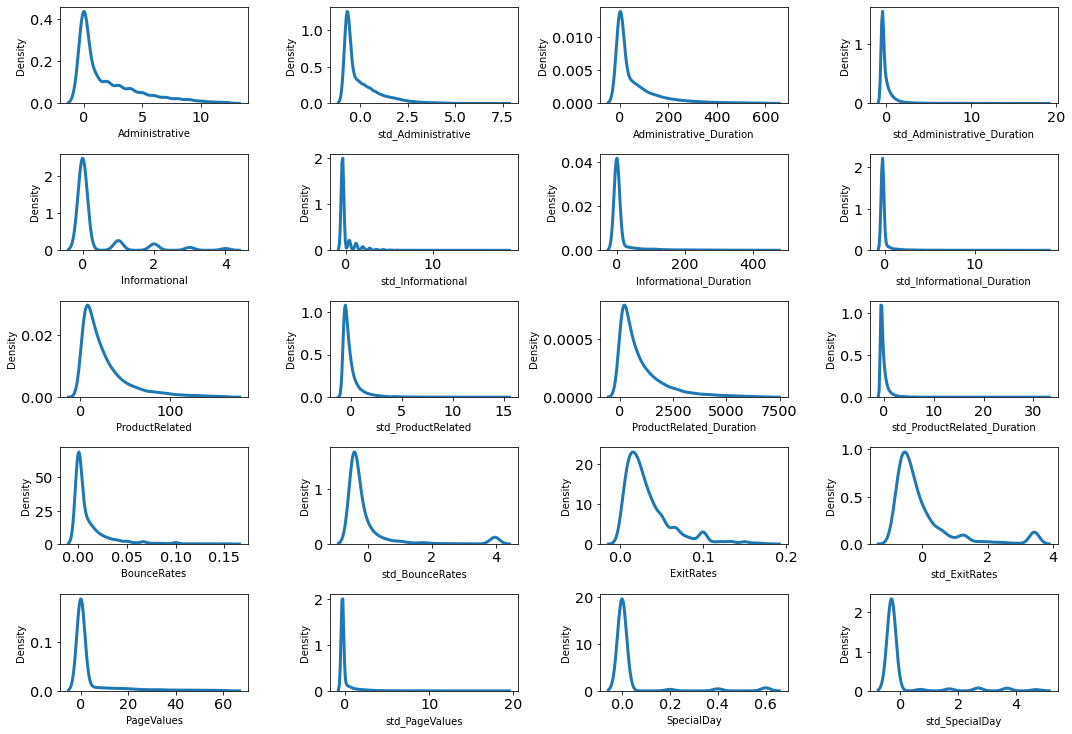

In [96]:
fig = plt.figure(figsize=(15, 20))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(10, 4, (2*i)+1) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_zscore, x=nums[i]) # 
    ax = fig.add_subplot(10, 4, (2*i)+2) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_std_scaler, x=nums_std[i])

    plt.tight_layout()

Menggunakan Yeo - Jonshon

In [97]:
from sklearn.preprocessing import PowerTransformer
scaler_yeo_jonshon = PowerTransformer(method='yeo-johnson')

In [98]:
df_ol_shop_yeo_jo = df_ol_shop_2.copy()
df_ol_shop_yeo_jo.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
6314,0,0.000000,0,0.0,12,274.750000,0.000000,0.030556,0.000000,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
9642,9,177.333333,0,0.0,70,2346.220238,0.002899,0.003458,0.000000,0.0,Nov,1,1,5,3,Returning_Visitor,False,False
9539,2,1668.500000,4,35.0,18,1372.975000,0.000000,0.017391,41.646259,0.0,Dec,2,2,1,6,Returning_Visitor,False,True
3642,0,0.000000,0,0.0,8,388.500000,0.000000,0.014286,0.000000,0.0,May,3,2,6,4,Returning_Visitor,False,False
322,4,111.000000,0,0.0,4,54.000000,0.000000,0.028571,0.000000,0.0,Mar,2,2,1,1,Returning_Visitor,False,False


In [99]:
nums_yj = []
for col in nums:
    col_name = 'yj_' + col
    nums_yj.append(col_name)
    df_ol_shop_yeo_jo[col_name] = scaler_yeo_jonshon.fit_transform(df_ol_shop_yeo_jo[col].values.reshape(len(df_ol_shop_yeo_jo), 1))
    df_ol_shop_yeo_jo = df_ol_shop_yeo_jo.drop(columns=col)

df_ol_shop_yeo_jo.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_ExitRates,yj_PageValues,yj_SpecialDay
12134,Dec,1,1,1,2,New_Visitor,False,False,1.028024,0.960775,-0.523851,-0.494799,-1.620640,-1.475875,1.382304,-0.309131,-0.532801,-0.337630
9810,Nov,1,2,1,8,New_Visitor,False,True,0.074401,0.429164,-0.523851,-0.494799,0.236785,-0.068566,-0.802948,-1.103253,1.973000,-0.337630
5121,May,2,2,1,6,Returning_Visitor,False,False,-0.998474,-1.005468,-0.523851,-0.494799,-1.169325,-1.091740,-0.802948,0.762250,-0.532801,-0.337630
4544,May,2,2,4,3,Returning_Visitor,True,False,0.550281,0.550755,1.807721,1.945359,1.605585,1.489504,-0.028705,0.444494,-0.532801,2.972664
8037,Nov,2,2,1,1,Returning_Visitor,False,False,1.652560,1.171593,1.953214,2.047156,2.250049,2.191758,-0.370129,-0.738804,-0.532801,-0.337630


Perbandingan Sebaran Data Sebelum dan Sesudah dilakukan Yeo-Jonshon

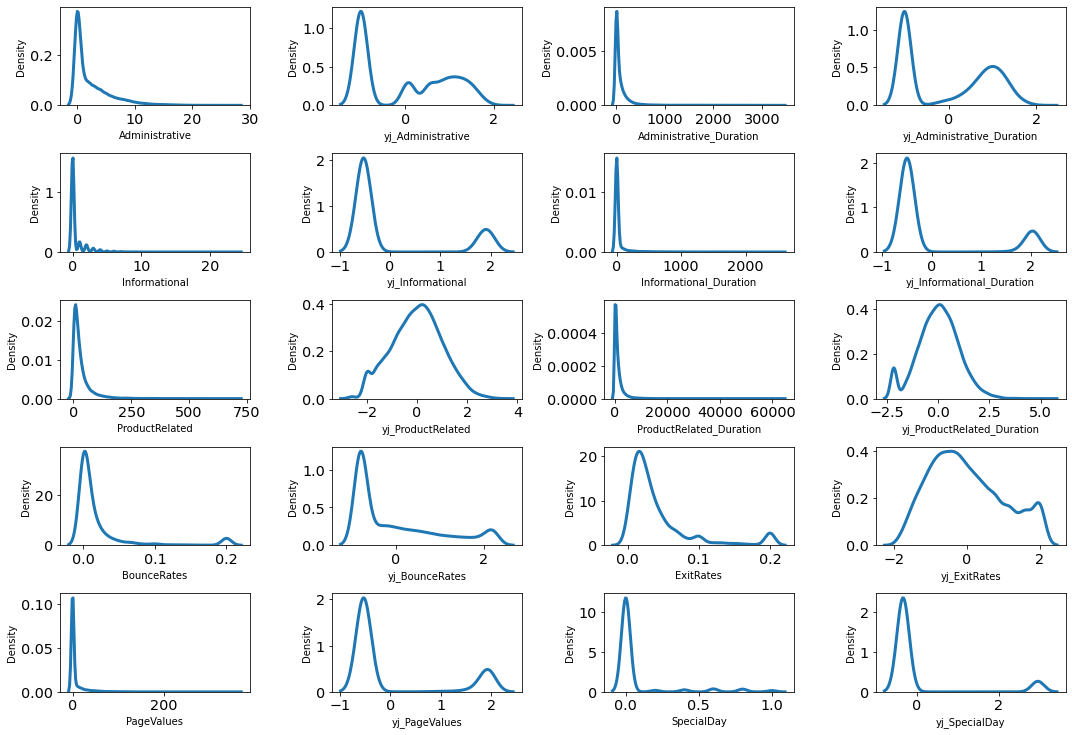

In [100]:
fig = plt.figure(figsize=(15, 20))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(10, 4, (2*i)+1) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_2, x=nums[i]) # 
    ax = fig.add_subplot(10, 4, (2*i)+2) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_yeo_jo, x=nums_yj[i])

    plt.tight_layout()

In [101]:
df_ol_shop_yeo_jo[nums_yj].describe()

,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_ExitRates,yj_PageValues,yj_SpecialDay
count,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04
mean,4.748889e-15,-2.088311e-15,1.974951e-15,-6.286364e-15,-8.359102e-16,-4.367757e-16,2.428791e-15,-9.520356e-17,-6.609470e-15,4.478370e-16
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-9.984738e-01,-1.005468e+00,-5.238515e-01,-4.947987e-01,-2.580459e+00,-2.168082e+00,-8.029476e-01,-1.811469e+00,-5.328007e-01,-3.376299e-01
25%,-9.984738e-01,-1.005468e+00,-5.238515e-01,-4.947987e-01,-6.460268e-01,-6.320189e-01,-8.029476e-01,-7.637588e-01,-5.328007e-01,-3.376299e-01
50%,7.440136e-02,1.030641e-01,-5.238515e-01,-4.947987e-01,2.542071e-02,1.985934e-02,-4.793771e-01,-1.694811e-01,-5.328007e-01,-3.376299e-01
75%,1.028024e+00,9.744059e-01,-5.238515e-01,-4.947987e-01,6.782554e-01,6.527018e-01,6.366262e-01,7.206251e-01,-5.328007e-01,-3.376299e-01
max,1.978077e+00,2.015436e+00,1.993723e+00,2.077830e+00,3.374537e+00,5.338706e+00,2.219446e+00,2.011278e+00,1.979914e+00,2.972664e+00


Feature Transformation yang digunakan untuk dataset ini adalah Yeo-Jonshon, karena dapat mengubah sebaran data mendekati normal. Dan hasil nilai yang di-scaling oleh Yeo-Jonshon bisa digunakan untuk kebutuhan handling class imbalance

## E. Feature encoding

In [102]:
# cats = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month', 
#         'VisitorType', 'Weekend', 'Revenue']
df_ol_shop_feature_encoding = df_ol_shop_yeo_jo.copy()
df_ol_shop_feature_encoding.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_ExitRates,yj_PageValues,yj_SpecialDay
3909,May,2,2,9,3,Returning_Visitor,False,False,-0.998474,-1.005468,-0.523851,-0.494799,-0.646027,-0.799406,-0.802948,-0.169481,-0.532801,2.969756
9791,Dec,3,2,4,13,Returning_Visitor,False,False,-0.998474,-1.005468,-0.523851,-0.494799,0.309362,0.306134,0.595454,0.043324,-0.532801,-0.337630
4491,May,3,2,1,6,Returning_Visitor,False,False,-0.998474,-1.005468,-0.523851,-0.494799,1.009176,0.778566,1.761129,1.242020,-0.532801,-0.337630
3502,May,3,2,2,13,Returning_Visitor,False,False,-0.998474,-1.005468,-0.523851,-0.494799,-0.551772,-0.254870,2.188520,1.778488,-0.532801,2.899571
7138,Nov,1,1,1,2,Returning_Visitor,False,False,1.282480,1.229323,-0.523851,-0.494799,0.115887,-0.561955,-0.802948,-1.682859,-0.532801,-0.337630


Label Encoding untuk Fitur Kategorikal

In [103]:
for col in cats:
    print('column:', col, df_ol_shop_feature_encoding[col].value_counts())

column: OperatingSystems 2    6541
1    2549
3    2530
4     478
8      75
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64
column: Browser 2     7883
1     2427
4      731
5      465
6      174
10     163
8      135
3      105
13      56
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64
column: Region 1    4714
3    2379
4    1171
2    1128
6     801
7     758
9     505
8     431
5     318
Name: Region, dtype: int64
column: TrafficType 2     3911
1     2388
3     2013
4     1066
13     728
10     450
6      443
8      343
5      260
11     247
20     193
9       41
7       40
15      37
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64
column: Month May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: Month, dtype: int64
column: VisitorType Returning_Visitor    10431
New_Visitor           1693
Other                  

One Hot Encoding untuk fitur VisitorType

In [104]:
ohe_visitor_type = pd.get_dummies(df_ol_shop_feature_encoding['VisitorType'], prefix='visitor_type', drop_first=True, )

# print(ohe_visitor_type)
df_ol_shop_feature_encoding = df_ol_shop_feature_encoding.join(ohe_visitor_type)

df_ol_shop_feature_encoding.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_ExitRates,yj_PageValues,yj_SpecialDay,visitor_type_Other,visitor_type_Returning_Visitor
3172,May,3,2,3,4,Returning_Visitor,False,False,-0.998474,-1.005468,-0.523851,-0.494799,-0.870293,-1.437577,2.199182,1.778488,-0.532801,-0.337630,0,1
4539,May,2,2,3,4,Returning_Visitor,False,False,-0.998474,-1.005468,-0.523851,-0.494799,-0.187754,-0.647804,1.635315,1.238257,-0.532801,-0.337630,0,1
2772,May,2,2,2,2,Returning_Visitor,False,False,-0.998474,-1.005468,-0.523851,-0.494799,1.978914,1.688623,-0.200689,-0.638907,-0.532801,2.969756,0,1
12203,Nov,2,2,3,11,Returning_Visitor,False,False,1.028024,0.893985,-0.523851,-0.494799,-0.129623,-0.322180,-0.802948,-0.370615,-0.532801,-0.337630,0,1
10664,Nov,1,1,1,10,Returning_Visitor,True,False,-0.998474,-1.005468,-0.523851,-0.494799,0.408507,0.041950,0.436571,0.180482,-0.532801,-0.337630,0,1


Label Encoding untuk Fitur Weekend, Month

In [105]:
mapping_weekend = {
    False: 0,
    True: 1
}

mapping_month = {
    "Jan": 1,
    "Feb": 2, 
    "Mar": 3, 
    "Apr": 4, 
    "May": 5, 
    "June": 6, 
    "Jul": 7, 
    "Aug": 8, 
    "Sep": 9, 
    "Oct": 10, 
    "Nov": 11, 
    "Dec": 12
}



df_ol_shop_feature_encoding['Weekend'] = df_ol_shop_feature_encoding['Weekend'].map(mapping_weekend)
df_ol_shop_feature_encoding['Month'] = df_ol_shop_feature_encoding['Month'].map(mapping_month)
# df_ol_shop_feature_encoding['OperatingSystems'] = df_ol_shop_feature_encoding.apply(lambda x: map_operating_system_type(x), axis=1)
# df_ol_shop_feature_encoding['Browser'] = df_ol_shop_feature_encoding.apply(lambda x: map_browser_type(x), axis=1)
# df_ol_shop_feature_encoding['TrafficType'] = df_ol_shop_feature_encoding.apply(lambda x: map_traffic_type(x), axis=1)
df_ol_shop_feature_encoding.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_ExitRates,yj_PageValues,yj_SpecialDay,visitor_type_Other,visitor_type_Returning_Visitor
2739,5,1,1,1,1,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,-0.494799,0.678255,0.383967,1.515093,0.835839,-0.532801,2.899571,0,1
6759,10,2,2,1,2,Returning_Visitor,1,False,1.028024,1.282843,-0.523851,-0.494799,-0.751231,-0.524200,0.726271,1.090307,-0.532801,-0.337630,0,1
9862,11,2,2,3,1,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,-0.494799,-0.249840,-0.821129,0.556476,0.864934,-0.532801,-0.337630,0,1
6638,11,2,2,3,2,New_Visitor,0,False,-0.998474,-1.005468,-0.523851,-0.494799,0.701359,0.838537,-0.802948,-1.596430,-0.532801,-0.337630,0,0
3389,5,2,2,6,3,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,-0.494799,-1.620640,-1.312084,-0.802948,1.610382,-0.532801,2.899571,0,1


Fitur Encoding untuk fiture OS, browser type, traffic type, region

Encoding menggunakan Nilai Threshold

In [106]:
from collections import Counter
def cumulatively_categorise(column,threshold=0.90,return_categories_list=True):
  #Find the threshold value using the percentage and number of instances in the column
  threshold_value=int(threshold*len(column))
  #Initialise an empty list for our new minimised categories
  categories_list=[]
  #Initialise a variable to calculate the sum of frequencies
  s=0
  #Create a counter dictionary of the form unique_value: frequency
  counts=Counter(column)

  #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
  for i,j in counts.most_common():
    #Add the frequency to the global sum
    s+=dict(counts)[i]
    #Append the category name to the list
    categories_list.append(i)
    #Check if the global sum has reached the threshold value, if so break the loop
    if s>=threshold_value:
      break
  #Append the category Other to the list
  categories_list.append(0)

  #Replace all instances not in our new categories by Other  
  new_column=column.apply(lambda x: x if x in categories_list else 0)

  #Return transformed column and unique values if return_categories=True
  if(return_categories_list):
    return new_column,categories_list
  #Return only the transformed column if return_categories=False
  else:
    return new_column

In [107]:
#Call the function with a default threshold of 75%
transformed_column_os, new_category_list_os = cumulatively_categorise(df_ol_shop_feature_encoding['OperatingSystems'], return_categories_list=True)
transformed_column_browser, new_category_list_browser = cumulatively_categorise(df_ol_shop_feature_encoding['Browser'], return_categories_list=True)
transformed_column_traffic_type, new_category_list_traffic_type = cumulatively_categorise(df_ol_shop_feature_encoding['TrafficType'], return_categories_list=True)
transformed_column_region, new_category_list_region = cumulatively_categorise(df_ol_shop_feature_encoding['Region'], return_categories_list=True)

In [108]:
df_ol_shop_feature_encoding['OperatingSystems'] = transformed_column_os
df_ol_shop_feature_encoding['Browser'] = transformed_column_browser
df_ol_shop_feature_encoding['TrafficType'] = transformed_column_traffic_type
df_ol_shop_feature_encoding['Region'] = transformed_column_region

In [109]:
df_ol_shop_feature_encoding['OperatingSystems'].value_counts()

2    6541
1    2549
3    2530
0     585
Name: OperatingSystems, dtype: int64

In [110]:
df_ol_shop_feature_encoding['Browser'].value_counts()

2    7883
1    2427
0    1164
4     731
Name: Browser, dtype: int64

In [111]:
df_ol_shop_feature_encoding['TrafficType'].value_counts()

2     3911
1     2388
3     2013
0     1206
4     1066
13     728
10     450
6      443
Name: TrafficType, dtype: int64

In [112]:
df_ol_shop_feature_encoding['Region'].value_counts()

1    4714
3    2379
4    1171
2    1128
6     801
7     758
0     749
9     505
Name: Region, dtype: int64

Dengan menggunakan Encoding Threshold, nilai unik untuk fitur OperatingSystems, Browser, TrafficType, Region menjadi lebih sedikit. Sehingga diharapkan performa model menjadi lebih baik

In [113]:
df_ol_shop_feature_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Month                           12205 non-null  int64  
 1   OperatingSystems                12205 non-null  int64  
 2   Browser                         12205 non-null  int64  
 3   Region                          12205 non-null  int64  
 4   TrafficType                     12205 non-null  int64  
 5   VisitorType                     12205 non-null  object 
 6   Weekend                         12205 non-null  int64  
 7   Revenue                         12205 non-null  bool   
 8   yj_Administrative               12205 non-null  float64
 9   yj_Administrative_Duration      12205 non-null  float64
 10  yj_Informational                12205 non-null  float64
 11  yj_Informational_Duration       12205 non-null  float64
 12  yj_ProductRelated               

## F. Handle class imbalance

In [114]:
df_ol_shop_feature_encoding['Revenue'].value_counts()

False    10297
True      1908
Name: Revenue, dtype: int64

**Distribusi nilai unik pada target mengalami ketimpangan, sehingga perlu dilakukan handling class imbalance**


Memisahkan data fitur dengan label

In [136]:
x = df_ol_shop_feature_encoding[[col for col in df_ol_shop_feature_encoding.columns if col not in ['VisitorType','Revenue']]]
y = df_ol_shop_feature_encoding['Revenue']

# **Feature Engineering**

Pengelompokan feature setelah dilakukan Transformasi dan Encoding

In [137]:
# import library
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [138]:
# pengelompokan kolom berdasarkan jenisnya

dnums = ['yj_Administrative', 'yj_Administrative_Duration', 'yj_Informational',
       'yj_Informational_Duration', 'yj_ProductRelated', 'yj_ProductRelated_Duration',
       'yj_BounceRates', 'yj_ExitRates', 'yj_PageValues', 'yj_SpecialDay']

dcats = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month',
        'visitor_type_Other','visitor_type_Returning_Visitor', 'Weekend']

nums_target =['yj_Administrative', 'yj_Administrative_Duration', 'yj_Informational',
                       'yj_Informational_Duration', 'yj_ProductRelated', 'yj_ProductRelated_Duration',
                       'yj_BounceRates', 'yj_ExitRates', 'yj_PageValues', 'yj_SpecialDay', 'Revenue']

Korelasi Features numerical terhadap target

<AxesSubplot:>

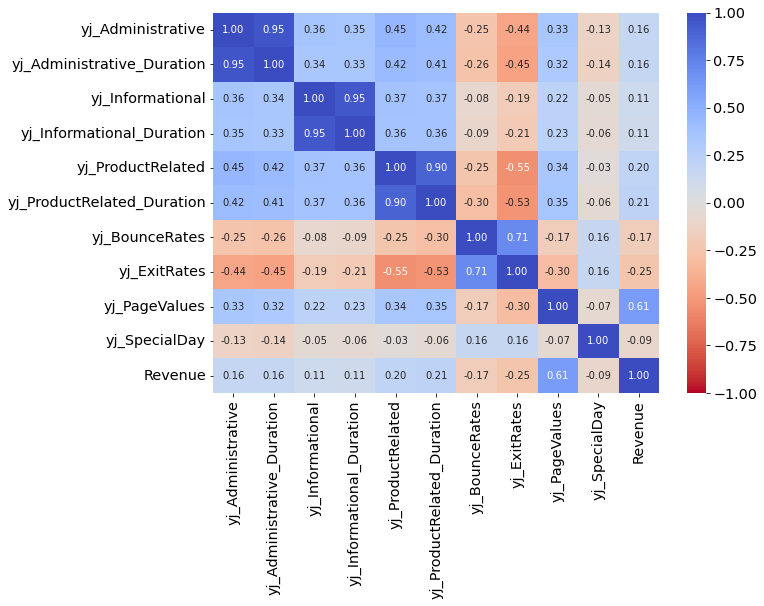

In [139]:
# ploting the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df_ol_shop_feature_encoding[nums_target].corr(), cmap='coolwarm_r', annot=True, fmt='.2f',vmin=-1, vmax=1)

***
**2.A Feature selection**

Kategori features yang bisa di-drop dari hasil Univariate dan Multivariate analysis adalah sbb : <br>

1. Feature kategorikal yg hanya punya 1 atau 2 data yg dominan  --> Browser dan Region <br>
2. Feature kategorical dengan jumlah nilai unique nya banyak  --> Untuk Feature-feature nya sudah dilakukan Thershold untuk mengurangi jumlah nunique-nya pada data cleansing.<br>
3. Salah satu dari 2 feature yang berkorelasi dengan nilai > 0.7 (redundant) --> ExitRate <br>

Asumsi awal features yang berpeluang untuk di-drop adalah : **Browser, Region, ExitRate**

**Asumsi** ini akan dicoba dilakukan **validasi** dengan **metode feature selection** dibawah.

Dari hasil Multivariate Analysis diketahui bahwa 

**Feature Extraction**
1. Terdapat korelasi antara administrative data ( administrative dan administrative duration). Karakteristik yang sama juga terjadi pada informational dan product related. Sehingga untuk menghindari pengulangan kita bisa mengkombinasikan antar fitur.
2. Page Value terlihat memiliki korelasi yang paling tinggi dengan Revenue.Nilai korelasi +- 0.29. (pasti + karena komponen penghitungannya salah satunya adalah yang menghasilkan revenue).
3. Sedangkan Feature Bounce Rate dan Exit Rate memiliki keterikatan sangat tinggi, sehingga hanya akan dipilih salah satu yaitu Exit Rate, untuk menghindari redundansi.

 **2.A.1 Feature selection for Numerical data**

**REDUNDANT FEATURES**

premis : jika 2 feature berkorelasi dengan nilai > 0.7 maka feature tersebut redundant dan bisa di-drop salah satunya

In [140]:
# function to get features correlation with threshold > 0.7

def correlation(dataset, threshold):
    col_corr = [] 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.append(colname)
    return col_corr 

corr_features = correlation(df_ol_shop_feature_encoding[dnums], 0.7)
corr_features

['yj_Administrative_Duration',
 'yj_Informational_Duration',
 'yj_ProductRelated_Duration',
 'yj_ExitRates']

***
Feature **ExitRates** berkorelasi  dengan **BounceRates** dengan nilai diatas 0.7 sehingga masuk kategori redundant feature. <br>
**Tiap Page Duration** berkorelasi kuat dengan **masing-masing page**. Namun feature2 ini akan dilakukan feature extraction pada point 2.B.<br>
***

**ANOVA f-test Feature Selection**

Method ini cocok untuk tipe data features numerical denga target berupa categorial

Feature yj_Administrative : 338.874
Feature yj_Administrative_Duration : 338.578
Feature yj_Informational : 152.135
Feature yj_Informational_Duration : 143.686
Feature yj_ProductRelated : 492.61
Feature yj_ProductRelated_Duration : 569.296
Feature yj_BounceRates : 374.634
Feature yj_ExitRates : 812.582
Feature yj_PageValues : 7292.268
Feature yj_SpecialDay : 95.393


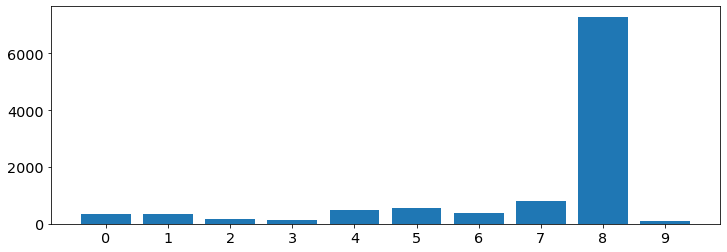

In [145]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(x[dnums], y)

# transform train input data
X_fs = fs.transform(x[dnums])

# what are scores for the features
for i in range(len(dnums)):
     print(f'Feature {dnums[i]} : {round(fs.scores_[i],3)}')

# plot the scores
pyplot.bar([i for i in range(len(dnums))], fs.scores_)
pyplot.xticks (np.arange(0, 10, step=1))
pyplot.show()

Dari hasil ANOVA f-test Feature Selection terlihat bahwa feature PageValue adalah fitur yang paling relevan.
Hal ini karena Page value merupakan nilai rata-rata untuk page yang dikunjungi pengguna sebelum menyelesaikan transaksi yang menghasilkan revenue.

Feature-feature lain tersebar dengan nilai relevansi yang tidak jauh berbeda.

MUTUAL INFORMATION

premis : semakin tingggi nilai mutual info maka semakin penting feature tersebut

In [146]:
# determine the mutual information
mutual_info = mutual_info_classif(x[dnums], y)
mutual_info

array([0.01920387, 0.012038  , 0.00611127, 0.00241644, 0.02223707,
       0.03153684, 0.02026066, 0.0409408 , 0.16509105, 0.00657104])

In [147]:
# ordering the features
mutual_info = pd.Series(mutual_info)
mutual_info.index = x[dnums].columns
mutual_info.sort_values(ascending=False)

yj_PageValues                 0.165091
yj_ExitRates                  0.040941
yj_ProductRelated_Duration    0.031537
yj_ProductRelated             0.022237
yj_BounceRates                0.020261
yj_Administrative             0.019204
yj_Administrative_Duration    0.012038
yj_SpecialDay                 0.006571
yj_Informational              0.006111
yj_Informational_Duration     0.002416
dtype: float64

<AxesSubplot:>

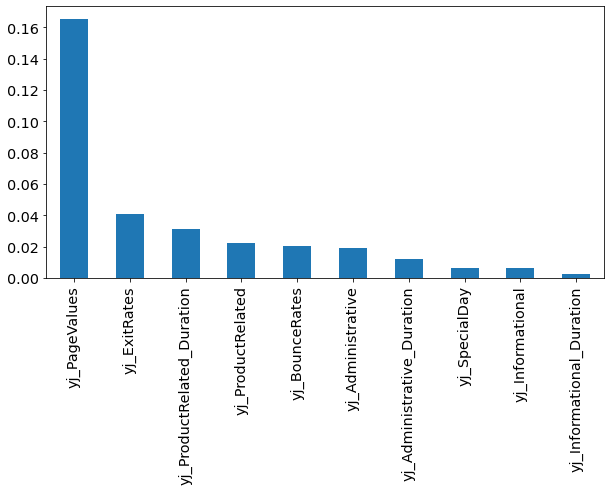

In [148]:
# plotting
mutual_info.sort_values(ascending=False).plot.bar(figsize=(10, 5))

feature dengan nilai mutual_info terendah adalah SpecialDay. Feature ini mempunyai nilai korelasi terhadap target sebesar -0.09 pada plot heatmap.
Sedangkan untuk feature Informational akan dilakukan feature extraction pada 2.B

2.A.1 Feature selection for Categoricals data
Define Hypothesis

Null Hypothesis (H0): feature tidak berkorelasi terhadap target.

Alternate Hypothesis (H1): feature berkorelasi terhadap target.

In [132]:
from scipy.stats import chi2, chi2_contingency

In [133]:
c = 'Revenue'
for r in dcats :
        cont = pd.crosstab(df_ol_shop_feature_encoding[c], df_ol_shop_feature_encoding[r])
        X2, p, dof, expected = chi2_contingency(cont)
        if (p<=0.05) :
            stat = 'Berkorelasi dengan'
        else :
            stat = 'Tidak berkorelasi dengan'
        print (c+' '+stat+' '+r+' dengan nilai p value= '+str(round(p,7)) )

Revenue Berkorelasi dengan OperatingSystems dengan nilai p value= 0.0
Revenue Tidak berkorelasi dengan Browser dengan nilai p value= 0.2936528
Revenue Tidak berkorelasi dengan Region dengan nilai p value= 0.3226673
Revenue Berkorelasi dengan TrafficType dengan nilai p value= 0.0
Revenue Berkorelasi dengan Month dengan nilai p value= 0.0
Revenue Tidak berkorelasi dengan visitor_type_Other dengan nilai p value= 0.3837685
Revenue Berkorelasi dengan visitor_type_Returning_Visitor dengan nilai p value= 0.0
Revenue Berkorelasi dengan Weekend dengan nilai p value= 0.0024138


***
Dari hasil Chi-squared test dengan nilai confidence interval 95% terlihat bahwa feature **Browser, Region dan visitor_type_other** adalah fitur yang tidak berkorelasi dengan fitur target Revenue (H0). <br>
Hal ini bisa menjadi insight bahwa region(daerah) dari customer tidak mempengaruhi pembelian mereka. 

Feature-feature kategorikal lain tetap dipertahankan. <br>
***

#### **DROP FEATURE PADA DATAFRAME**

In [91]:
# droping features
df_select = df_ol_shop_feature_encoding.drop(['yj_ExitRates'], axis=1)

df_select.head(3)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_PageValues,yj_SpecialDay,visitor_type_Other,visitor_type_Returning_Visitor
0,2,1,1,1,1,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,-0.494799,-1.976591,-2.168082,2.219446,-0.532801,-0.33763,0,1
1,2,2,2,1,2,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,-0.494799,-1.620640,-1.115160,-0.802948,-0.532801,-0.33763,0,1
2,2,0,1,9,3,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,-0.494799,-1.976591,-2.168082,2.219446,-0.532801,-0.33763,0,1


 2.B Feature extraction

#### **2.B.1 Total Visit**

Merupakan Total jumlah page yang dikunjungi per masing-masing sesi

In [92]:
# Total durasi kunjungan per masing-masing sesi
df_ex = df_select.copy()
df_ex['totalPage_visit'] = df_ex['yj_Administrative'] + df_ex['yj_Informational'] + df_ex ['yj_ProductRelated']


In [93]:
df_ex.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_PageValues,yj_SpecialDay,visitor_type_Other,visitor_type_Returning_Visitor,totalPage_visit
736,3,2,4,4,0,Returning_Visitor,0,False,0.074401,0.162704,-0.523851,-0.494799,-0.751231,-0.074187,-0.802948,-0.532801,-0.33763,0,1,-1.200681
9941,12,1,1,1,2,Returning_Visitor,0,False,-0.998474,-1.005468,1.953214,2.029524,0.745904,0.601543,-0.490757,-0.532801,-0.33763,0,1,1.700645
6113,7,1,1,2,4,Returning_Visitor,1,False,-0.998474,-1.005468,-0.523851,-0.494799,-0.316462,-0.557307,1.185366,-0.532801,-0.33763,0,1,-1.838787
856,3,2,2,3,2,New_Visitor,0,False,0.834177,1.165301,-0.523851,-0.494799,-0.751231,-0.408807,-0.802948,-0.532801,-0.33763,0,0,-0.440906
9202,11,1,1,1,1,Returning_Visitor,0,True,1.446582,1.314894,1.979993,2.051808,2.046241,2.023130,-0.083923,1.744015,-0.33763,0,1,5.472816


**2.B.2 Total Duration**

 Total durasi kunjungan per masing-masing sesi

In [94]:
# Total durasi kunjungan per masing-masing sesi
df_ex['total_duration'] = df_ex['yj_Administrative_Duration'] + df_ex['yj_Informational_Duration'] + df_ex ['yj_ProductRelated_Duration']

In [95]:
df_ex.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,...,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_PageValues,yj_SpecialDay,visitor_type_Other,visitor_type_Returning_Visitor,totalPage_visit,total_duration
2807,5,3,2,4,4,Returning_Visitor,0,True,1.282480,0.853333,...,2.058123,1.117269,0.921006,-0.183226,1.940589,2.899571,0,1,4.207470,3.832463
2769,5,2,2,0,3,New_Visitor,0,False,0.834177,0.827186,...,-0.494799,-0.249840,0.915862,-0.802948,-0.532801,-0.337630,0,0,0.060485,1.248249
3931,5,1,1,6,2,Returning_Visitor,0,False,0.074401,-1.005468,...,-0.494799,-2.580459,-2.168082,2.219446,-0.532801,-0.337630,0,1,-0.698337,-3.668349
9706,11,0,1,3,0,New_Visitor,0,True,1.446582,1.823664,...,2.067422,-0.187754,0.775990,-0.802948,-0.532801,-0.337630,0,0,3.212041,4.667076
950,3,1,1,1,1,Returning_Visitor,1,False,-0.998474,-1.005468,...,-0.494799,0.553196,1.405234,-0.802948,-0.532801,-0.337630,0,1,-0.969129,-0.095033


**2.B.3 Rasio (Duration/Page)**

In [96]:
df_ex['adm_rasio'] = df_ex['yj_Administrative_Duration'] / df_ex['yj_Administrative']
df_ex['info_rasio'] = df_ex['yj_Informational_Duration'] / df_ex['yj_Informational']
df_ex['product_rasio'] = df_ex['yj_ProductRelated_Duration'] / df_ex['yj_ProductRelated']

df_ex['adm_rasio'] = df_ex['adm_rasio'].fillna(0)
df_ex['info_rasio'] = df_ex['info_rasio'].fillna(0)
df_ex['product_rasio'] = df_ex['product_rasio'].fillna(0)

df_ex.head(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,...,yj_BounceRates,yj_PageValues,yj_SpecialDay,visitor_type_Other,visitor_type_Returning_Visitor,totalPage_visit,total_duration,adm_rasio,info_rasio,product_rasio
0,2,1,1,1,1,Returning_Visitor,0,False,-0.998474,-1.005468,...,2.219446,-0.532801,-0.33763,0,1,-3.498917,-3.668349,1.007005,0.94454,1.096879
1,2,2,2,1,2,Returning_Visitor,0,False,-0.998474,-1.005468,...,-0.802948,-0.532801,-0.33763,0,1,-3.142966,-2.615427,1.007005,0.94454,0.688098
2,2,0,1,9,3,Returning_Visitor,0,False,-0.998474,-1.005468,...,2.219446,-0.532801,-0.33763,0,1,-3.498917,-3.668349,1.007005,0.94454,1.096879
3,2,3,2,2,4,Returning_Visitor,0,False,-0.998474,-1.005468,...,1.772681,-0.532801,-0.33763,0,1,-3.142966,-3.439203,1.007005,0.94454,1.196401
4,2,3,0,1,4,Returning_Visitor,1,False,-0.998474,-1.005468,...,0.827019,-0.532801,-0.33763,0,1,-1.988715,-1.460985,1.007005,0.94454,-0.084225


**2.C Feature tambahan**

1. Customer ID - Data memiliki unique value dan bisa diketahui dan dilakukan tracing perilaku konsumen dan transaksi berulang
2. Returning Page - Untuk dapat mengetahui page-page mana yang dibuka berulang kali, hal ini menandakan ketertarikan konsumen pada page tersebut
3. Seller Reputation - Asumsinya reputasi seller akan berpengaruh pada minat beli dan keputusan beli
4. Satisfaction Score - untuk mengetahui kepuasan terhadap transaksi di web dan kaitannya apakah dapat meningkatkan revenue
5. Product in Basket - fitur ini dapat mengetahui user yang memiliki minat beli namun belum melakukan transaksi.
6. Gender - Fitur ini bertujuan untuk mengetahui sebaran revenue per masing-masing Jenis kelamin user


# **Data Stage 3**

In [5]:
df = pd.read_csv(r'C:\Users\Iqbal\Downloads\Datapre (1).csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Month                           12205 non-null  int64  
 1   OperatingSystems                12205 non-null  int64  
 2   Browser                         12205 non-null  int64  
 3   Region                          12205 non-null  int64  
 4   TrafficType                     12205 non-null  int64  
 5   VisitorType                     12205 non-null  object 
 6   Weekend                         12205 non-null  int64  
 7   Revenue                         12205 non-null  bool   
 8   yj_Administrative               12205 non-null  float64
 9   yj_Administrative_Duration      12205 non-null  float64
 10  yj_Informational                12205 non-null  float64
 11  yj_Informational_Duration       12205 non-null  float64
 12  yj_ProductRelated               

In [7]:

df.head()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,...,yj_ExitRates,yj_PageValues,yj_SpecialDay,visitor_type_Other,visitor_type_Returning_Visitor,totalPage_visit,total_duration,adm_rasio,info_rasio,product_rasio
0,2,1,1,1,1,Returning_Visitor,0,False,-0.998474,-1.005468,...,2.011278,-0.532801,-0.33763,0,1,-3.498917,-3.668349,1.007005,0.94454,1.096879
1,2,2,2,1,2,Returning_Visitor,0,False,-0.998474,-1.005468,...,1.610382,-0.532801,-0.33763,0,1,-3.142966,-2.615427,1.007005,0.94454,0.688098
2,2,0,1,9,3,Returning_Visitor,0,False,-0.998474,-1.005468,...,2.011278,-0.532801,-0.33763,0,1,-3.498917,-3.668349,1.007005,0.94454,1.096879
3,2,3,2,2,4,Returning_Visitor,0,False,-0.998474,-1.005468,...,1.867073,-0.532801,-0.33763,0,1,-3.142966,-3.439203,1.007005,0.94454,1.196401
4,2,3,0,1,4,Returning_Visitor,1,False,-0.998474,-1.005468,...,0.762250,-0.532801,-0.33763,0,1,-1.988715,-1.460985,1.007005,0.94454,-0.084225


# Split untuk data training dan test




In [14]:
X = df[[col for col in df.columns if col not in ['VisitorType','Revenue','yj_BounceRates','yj_Administrative','yj_Administrative_Duration','yj_Informational','yj_Informational_Duration','yj_ProductRelated','yj_ProductRelated_Duration']]]
y = df['Revenue']

In [15]:
#Splitting the data into Train and Test
from scipy import stats
from imblearn import under_sampling, over_sampling
from sklearn.model_selection import train_test_split
Xtrain, X_test, ytrain, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [16]:
X_train, y_train = over_sampling.SMOTE(0.6,random_state=123).fit_resample(Xtrain, ytrain)

In [17]:
print('Nilai unik target sebelum oversampling:\n', pd.Series(y).value_counts())
print('Nilai unik target sesudah oversampling:\n', pd.Series(y_train).value_counts())

Nilai unik target sebelum oversampling:
 False    10297
True      1908
Name: Revenue, dtype: int64
Nilai unik target sesudah oversampling:
 False    8268
True     4960
Name: Revenue, dtype: int64


Karena nilai unik target mengalami ketimpangan yang cukup jauh, maka dilakukan Handling Class Imbalance dengan cara melakukan oversampling dengan menggunakan SMOTE pembagian False/True pada rasio 5:3 untuk menghidanri overfitting pada model

# **Machine Learning**

Import Library

In [78]:
# import library
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

Split Features and Target

In [11]:
# split feature and target

# features
X = df.drop(['Revenue','VisitorType','yj_BounceRates','yj_Administrative','yj_Administrative_Duration','yj_Informational','yj_Informational_Duration','yj_ProductRelated','yj_ProductRelated_Duration'], axis=1)
# target
y = df['Revenue'].copy()

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import plot_confusion_matrix


    


def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    confusion_matrix = pd.crosstab(y_test, y_pred,rownames=['Actual'],colnames=['Predicted'])
    print(confusion_matrix)
    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [81]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

In [82]:
df.Revenue.value_counts(normalize=True)

False    0.843671
True     0.156329
Name: Revenue, dtype: float64

<br/><br/><br/>


---
# Logistic Regression

Fit Model

Predicted  False  True
Actual                
False       1809   220
True          84   328
Accuracy (Test Set): 0.88
Precision (Test Set): 0.60
Recall (Test Set): 0.80
F1-Score (Test Set): 0.68
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.91
roc_auc (crossval train): 0.9023196565083511
roc_auc (crossval test): 0.8844403854272779


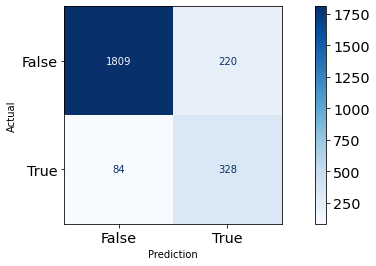

In [85]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Hyperparameter Tuning

Predicted  False  True
Actual                
False       1808   221
True          84   328
Accuracy (Test Set): 0.88
Precision (Test Set): 0.60
Recall (Test Set): 0.80
F1-Score (Test Set): 0.68
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.91
roc_auc (crossval train): 0.9034097210989325
roc_auc (crossval test): 0.8872959122177949


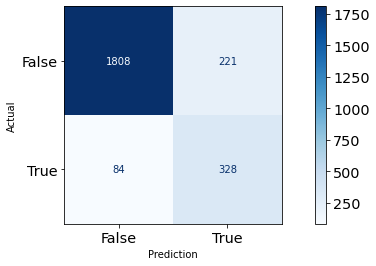

In [86]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='precision', random_state=1, cv=5, n_iter=50)
rs.fit(X_train, y_train)
eval_classification(rs)

Cek best hyperparameter after tuning

In [87]:
show_best_hyperparameter(rs)

{'C': 0.04143131313131314, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Feature Importance

In [88]:
X.columns

Index(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'Weekend', 'yj_ExitRates', 'yj_PageValues', 'yj_SpecialDay',
       'visitor_type_Other', 'visitor_type_Returning_Visitor',
       'totalPage_visit', 'total_duration', 'adm_rasio', 'info_rasio',
       'product_rasio'],
      dtype='object')

In [89]:
rs.best_estimator_.coef_

array([[ 0.16460474, -0.07782345,  0.0733718 , -0.05813971, -0.04571145,
         0.07804412, -0.43002364,  1.48872476, -0.15240401, -0.30155917,
        -0.51744756, -0.02771735, -0.00572194, -0.0219244 , -0.35429041,
        -0.01889326]])

Learning curve

param value: 0.0001; train: 0.8780189020631428; test: 0.8713628120409405
param value: 0.0006040404040404041; train: 0.9057373111646925; test: 0.9018108781885955
param value: 0.0011080808080808082; train: 0.9083216530502363; test: 0.9046220578313482
param value: 0.0016121212121212123; train: 0.909270852841113; test: 0.905618531296205
param value: 0.002116161616161616; train: 0.909768764533296; test: 0.9061652160182213
param value: 0.0026202020202020205; train: 0.9100891310454609; test: 0.9066102197744357
param value: 0.0031242424242424243; train: 0.9103030094651747; test: 0.9069487575782225
param value: 0.003628282828282828; train: 0.910449049580973; test: 0.9071676707163603
param value: 0.004132323232323233; train: 0.9105586589181764; test: 0.907344715221521
param value: 0.004636363636363637; train: 0.910657002512602; test: 0.9074499849272922
param value: 0.0051404040404040416; train: 0.9107372038719042; test: 0.9075660208529718
param value: 0.005644444444444445; train: 0.9108118455139

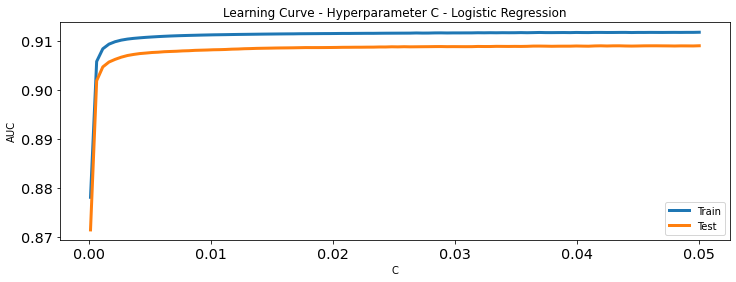

In [90]:
# learning curve
import numpy as np
param_values = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
draw_learning_curve(param_values)

<br/><br/><br/>


---
# k-Nearest Neighbor

**Fit model**

Predicted  False  True
Actual                
False       1705   324
True         125   287
Accuracy (Test Set): 0.82
Precision (Test Set): 0.47
Recall (Test Set): 0.70
F1-Score (Test Set): 0.56
roc_auc (test-proba): 0.85
roc_auc (train-proba): 0.99
roc_auc (crossval train): 0.954488986174313
roc_auc (crossval test): 0.8234055575668693


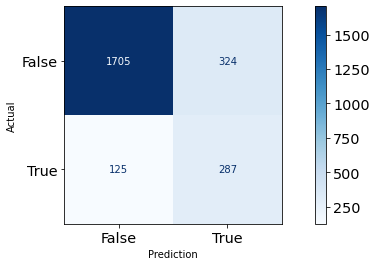

In [91]:
# knn
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn)

Hyperparameter Tuning

Predicted  False  True
Actual                
False       1782   247
True         181   231
Accuracy (Test Set): 0.82
Precision (Test Set): 0.48
Recall (Test Set): 0.56
F1-Score (Test Set): 0.52
roc_auc (test-proba): 0.72
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.933991345455237
roc_auc (crossval test): 0.8776398932590572


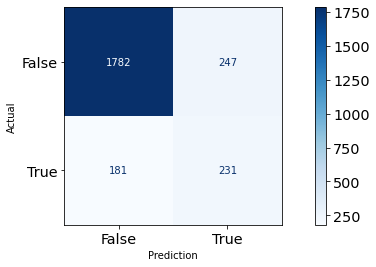

In [92]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn.fit(X_train, y_train)
rs = RandomizedSearchCV(knn, hyperparameters, scoring='precision', random_state=1, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)

param value: 1; train: 1.0; test: 0.7194723834496882
param value: 2; train: 0.9989598695709849; test: 0.788357649040371
param value: 3; train: 0.9964946958346989; test: 0.8219955068975583
param value: 4; train: 0.9926468228654588; test: 0.8412036394608278
param value: 5; train: 0.9883326773842409; test: 0.8526798317598703
param value: 6; train: 0.9842009174508795; test: 0.861971677664161
param value: 7; train: 0.9802439106465658; test: 0.8641153516725921
param value: 8; train: 0.9766343617834792; test: 0.868050405049118
param value: 9; train: 0.9734067752469685; test: 0.8730662672797829
param value: 10; train: 0.9704211339482185; test: 0.8780946901003412
param value: 11; train: 0.9678614206345489; test: 0.8832995593027317
param value: 12; train: 0.9654203633909202; test: 0.8861735418949503
param value: 13; train: 0.9632454288395211; test: 0.8889518247546497
param value: 14; train: 0.9609429865630414; test: 0.8901361089445755
param value: 15; train: 0.9586651972431605; test: 0.889599592

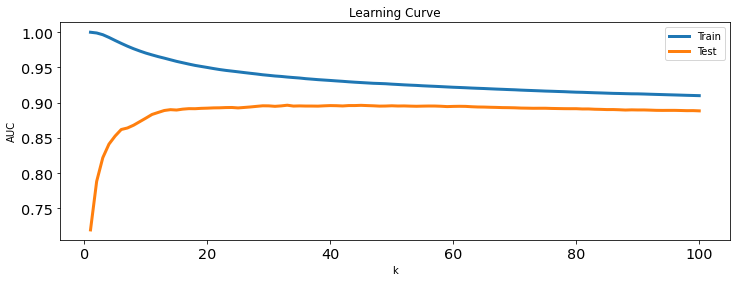

In [93]:
# Analyzing Learning Curve
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve(param_values)

<br/><br/><br/>


---
# Decision Tree

Fit Model

Predicted  False  True
Actual                
False       1842   187
True         157   255
Accuracy (Test Set): 0.86
Precision (Test Set): 0.58
Recall (Test Set): 0.62
F1-Score (Test Set): 0.60
roc_auc (test-proba): 0.76
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.7149979410868914


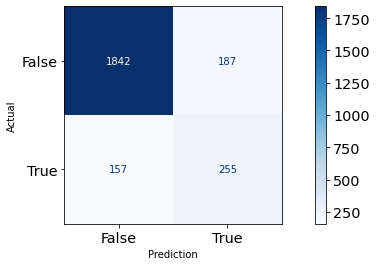

In [94]:
# decision tree
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Hyperparameter Tuning

Predicted  False  True
Actual                
False       1841   188
True         166   246
Accuracy (Test Set): 0.85
Precision (Test Set): 0.57
Recall (Test Set): 0.60
F1-Score (Test Set): 0.58
roc_auc (test-proba): 0.76
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9217837149559746
roc_auc (crossval test): 0.8663999985146298


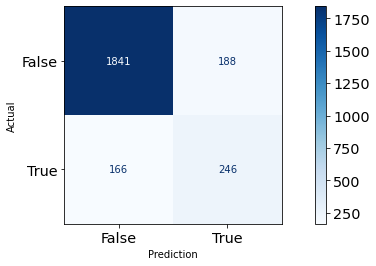

In [97]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = GridSearchCV(dt, hyperparameters, cv=5, scoring='recall')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model)

Feature Importance

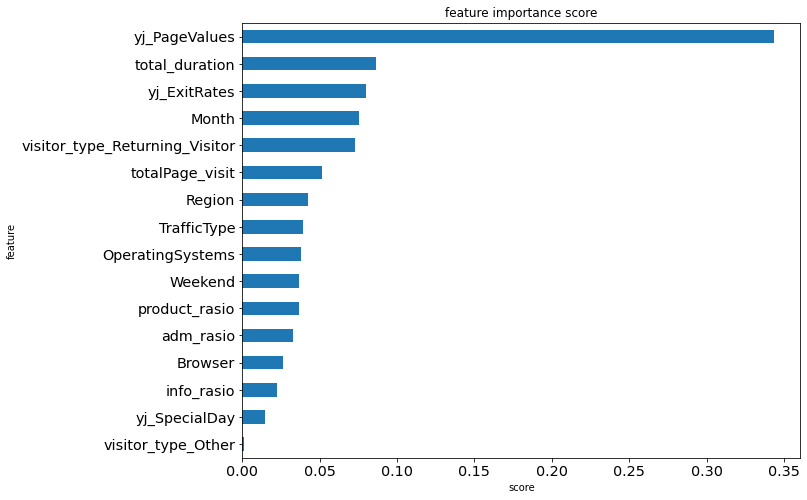

In [98]:
show_feature_importance(model.best_estimator_)

# Random Forest

**Fit Model**

Predicted  False  True
Actual                
False       1866   163
True         117   295
Accuracy (Test Set): 0.89
Precision (Test Set): 0.64
Recall (Test Set): 0.72
F1-Score (Test Set): 0.68
roc_auc (test-proba): 0.93
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9038079812997151


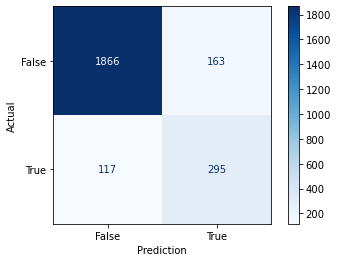

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Hyperparameter Tuning

Predicted  False  True
Actual                
False       1870   159
True         105   307
Accuracy (Test Set): 0.89
Precision (Test Set): 0.66
Recall (Test Set): 0.75
F1-Score (Test Set): 0.70
roc_auc (test-proba): 0.93
roc_auc (train-proba): 0.99
roc_auc (crossval train): 0.9678261175761319
roc_auc (crossval test): 0.9098982844635964


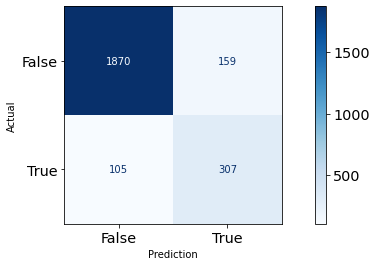

In [100]:
# tuning hyperparameter RF + oversampling
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='precision', random_state=1, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)

**Learning Curve**

param value: 2; train: 0.9996125998798322; test: 0.9310872207362181
param value: 3; train: 0.998080141860574; test: 0.9293783823874213
param value: 4; train: 0.9962976428749786; test: 0.9321046285175633
param value: 5; train: 0.9944896862368712; test: 0.9334372472928938
param value: 7; train: 0.9910198130764549; test: 0.9317457545206161
param value: 8; train: 0.9896294936170545; test: 0.9319359577389981
param value: 9; train: 0.9877216571468701; test: 0.9334300698129548
param value: 11; train: 0.9857602474366778; test: 0.932345074095518
param value: 12; train: 0.9842495162070634; test: 0.9312828070645542
param value: 13; train: 0.983210653783729; test: 0.9319120328058683
param value: 14; train: 0.981579023089408; test: 0.931135668725806
param value: 16; train: 0.9801617828940181; test: 0.9311691636321877
param value: 17; train: 0.979343455920221; test: 0.9310064740869051
param value: 18; train: 0.9788052850476772; test: 0.9302037925803998
param value: 20; train: 0.9771274696849104; tes

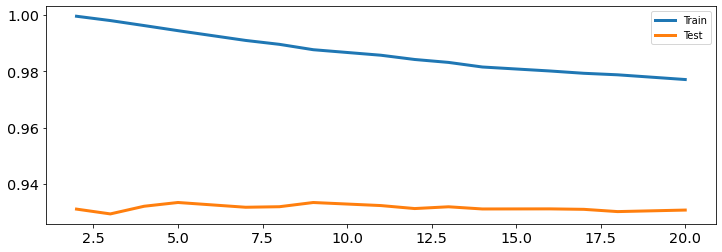

In [101]:
#learning curve
# param_values = [int(x) for x in np.linspace(1, 200, 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=75, min_samples_leaf=c)
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Feature Importance

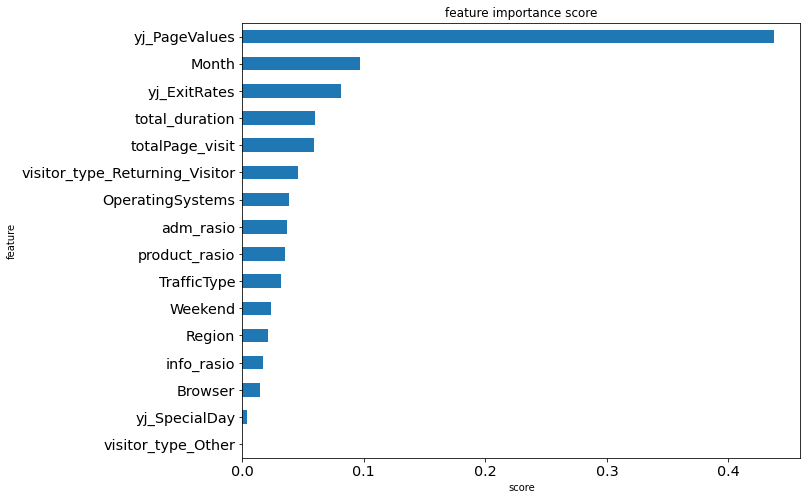

In [102]:
show_feature_importance(rs.best_estimator_)

Metric model yang kami gunakan adalah accuracy, precision dan recall, dimana kami berusaha untuk mengurangi nilai false positive dan false negative pada pemodelan. Sehingga model yang kami pilih adalah Random Forest dimana nilai accuracy, precision dan recall nya lebih baik dibanding model lain<br/><br/><br/>


---

# Boosting: Adaboost

Fit Model

Predicted  False  True
Actual                
False       1860   169
True         129   283
Accuracy (Test Set): 0.88
Precision (Test Set): 0.63
Recall (Test Set): 0.69
F1-Score (Test Set): 0.66
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.96
roc_auc (crossval train): 0.927015873843887
roc_auc (crossval test): 0.8966312297404071


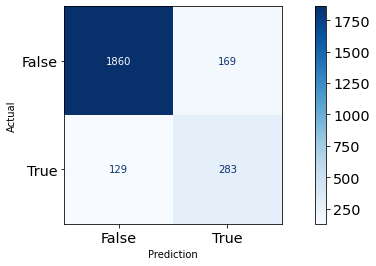

In [113]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
eval_classification(clf)

Hyperparameter Tuning

Predicted  False  True
Actual                
False       1854   175
True         126   286
Accuracy (Test Set): 0.88
Precision (Test Set): 0.62
Recall (Test Set): 0.69
F1-Score (Test Set): 0.66
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.96
roc_auc (crossval train): 0.9224727037578541
roc_auc (crossval test): 0.8994544795009937


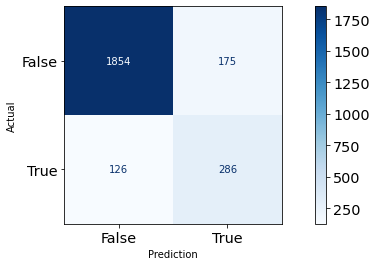

In [114]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='precision')
ab_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(ab_tuned)

<br/><br/><br/>


---
# Boosting: XGBoost

Fit Model

Predicted     0    1
Actual              
False      1903  126
True        149  263
Accuracy (Test Set): 0.89
Precision (Test Set): 0.68
Recall (Test Set): 0.64
F1-Score (Test Set): 0.66
roc_auc (test-proba): 0.92
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9978638011774861
roc_auc (crossval test): 0.9073552029511098


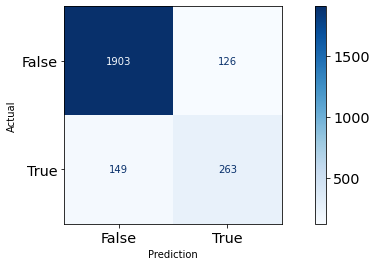

In [116]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train, y_train)
eval_classification(xg)

Hyperparameter Tuning

Predicted     0    1
Actual              
False      1877  152
True        138  274
Accuracy (Test Set): 0.88
Precision (Test Set): 0.64
Recall (Test Set): 0.67
F1-Score (Test Set): 0.65
roc_auc (test-proba): 0.91
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.995010059167053
roc_auc (crossval test): 0.8979914684913085


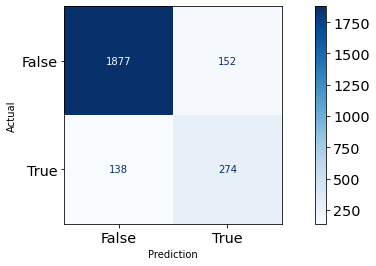

In [117]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned)

# Train The Model

In [20]:
dt = RandomForestClassifier()
dt.fit(X_train, y_train)

RandomForestClassifier()

# Draw The Plots

In [119]:
!pip install shap

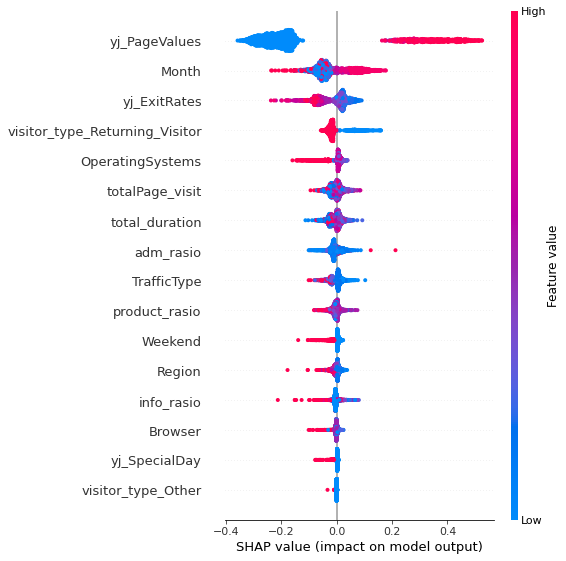

In [21]:
import shap
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test) # Summary shap value terhadap label positive